# Diabetic Hospital Readmission

# Overview

# Business Problem

# Data

"The data set represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

1. It is an inpatient encounter (a hospital admission).
2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3. The length of stay was at least 1 day and at most 14 days.
4. Laboratory tests were performed during the encounter.
5. Medications were administered during the encounter.

Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

## Imports

In [36]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from tqdm import tqdm
#tqdm.pandas(desc="progress-bar")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.ar_model import AR
from datetime import datetime

from statsmodels.tsa.stattools import adfuller

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import statsmodels.api as sm  
import itertools

In [106]:
# importing data
df = pd.read_csv('../data/diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [39]:
display(df.shape)
display(df.info())
display(df.describe())

(101766, 50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

None

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### Checking for null values

In [40]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [41]:
# In the dataset missing values are represented as '?' sign so isna will return that there are no nulls
# for the gender column missing values are logged in as unknown

missing_value_count = df.isin(['?', 'Unknown/Invalid']).sum()
print(missing_value_count)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

### Dropping Columns and taking care of null values

In [299]:
# Creating a copy of the DataFrame
df_clean = df.copy()

In [300]:
#dropping columns with large number of missing values
df_clean = df_clean.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [301]:
#sanity check
df_clean.shape, df.shape

((101766, 47), (101766, 50))

In [302]:
# Dropping all the the null values (makred with ?) 
# It doesn't makes sense for me to fill it in with the most frequeent

drop_conditions = (
    (df_clean['diag_1'] == '?') |
    (df_clean['diag_2'] == '?') | 
    (df_clean['diag_3'] == '?') |
    (df_clean['race'] == '?') |
    (df_clean['gender'] == 'Unknown/Invalid')
)

drop_rows = set(df_clean[drop_conditions].index)
new_rows = list(set(df_clean.index) - drop_rows)
df_clean = df_clean.iloc[new_rows]
df_clean

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [303]:
df_clean.isin(['?', 'Unknown/Invalid']).sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

### Dropping Dead Patients
Dropping patients that expired so that it will not bias the model.

In [304]:
# The definitions of the different numbers can be found in IDs_mapping.csv

discharge_codes_to_exclude = [11, 13, 14, 19, 20, 21]
df_clean = df_clean[~df_clean['discharge_disposition_id'].isin(discharge_codes_to_exclude)]

In [305]:
"""
The ~ operator is used to negate the boolean Series 
obtained from df_clean['discharge_disposition_id'].isin(discharge_codes_to_exclude). 

It effectively selects the rows where the 'discharge_disposition_id' 
is not present in the list of codes to exclude.
"""

"\nThe ~ operator is used to negate the boolean Series \nobtained from df_clean['discharge_disposition_id'].isin(discharge_codes_to_exclude). \n\nIt effectively selects the rows where the 'discharge_disposition_id' \nis not present in the list of codes to exclude.\n"

In [306]:
df_clean.shape

(95672, 47)

### Explorationn of specific columns

In [307]:
# checking target group to see if there is a class inbalance
df_clean['readmitted'].value_counts()

NO     50043
>30    34606
<30    11023
Name: readmitted, dtype: int64

There are three groups: 
- No (not readmitted), 
- />30 (readmitted but not within 30 days), 
- <30 (readmitte within 30 days)).

I will first make a model with biany yes or no readmission and another with multi-class.

In [308]:
df_clean['patient_nbr'].duplicated().sum()

28544

In [309]:
df_clean['encounter_id'].duplicated().sum()

0

Checked for duplicated entried but there are no duplicated entries since the encounter id are all different. This might come to be usefull when we want to focus on patients who were readmitted.

Since we do not want duplicated patients to bias towards those patients who had multiple encounters, I decided to use first encounters of patients with multiple encounters. This resulted in dataset being reduced to about 67,000 encounters:

In [310]:
df_clean = df_clean.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

In [311]:
df_clean.shape

(67128, 47)

### Graphing value_counts for all columns

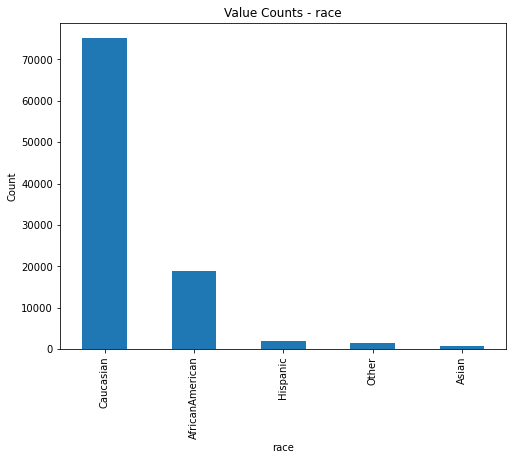

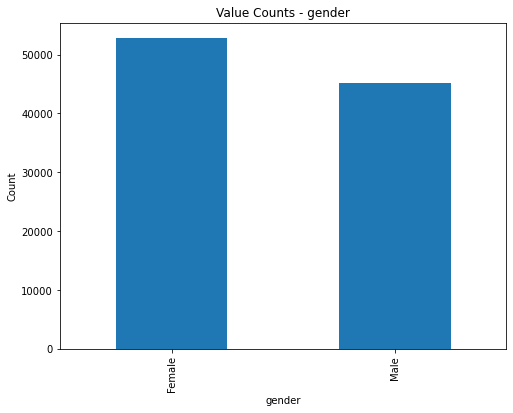

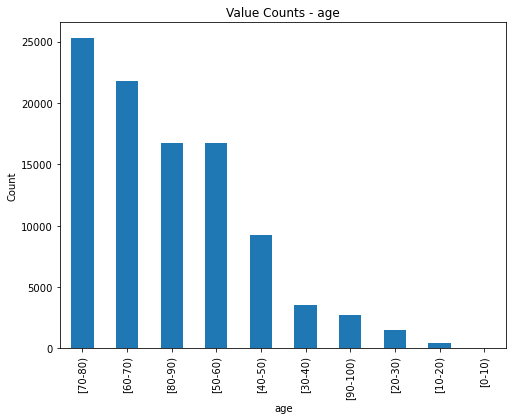

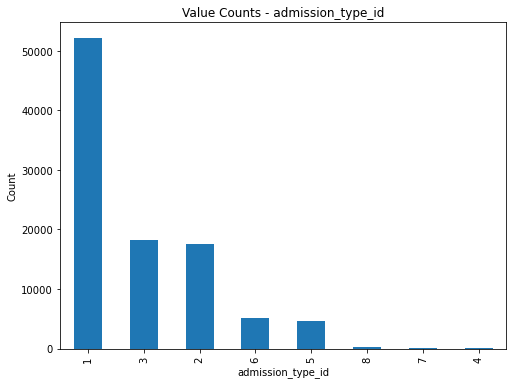

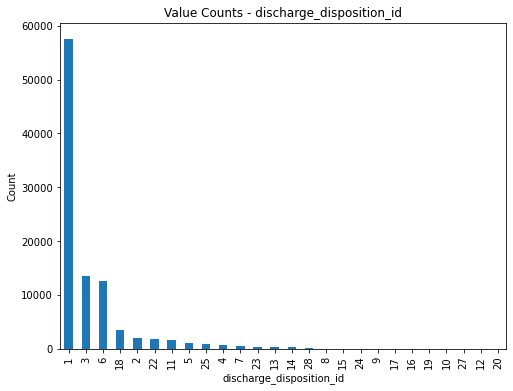

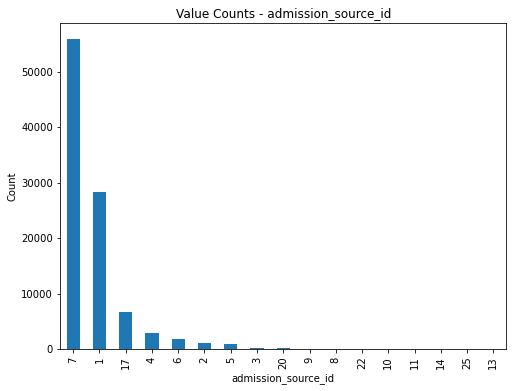

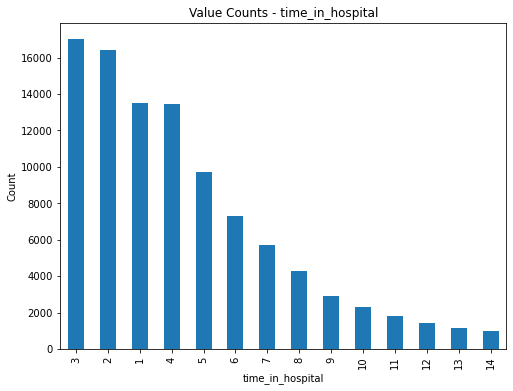

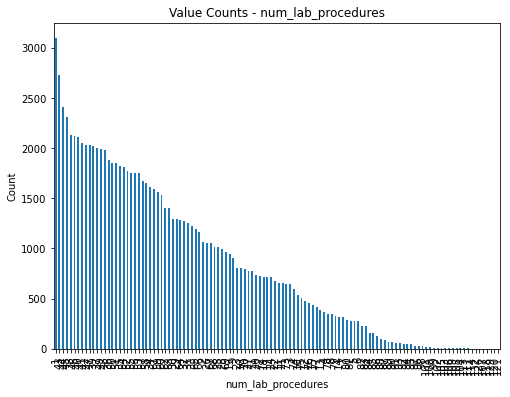

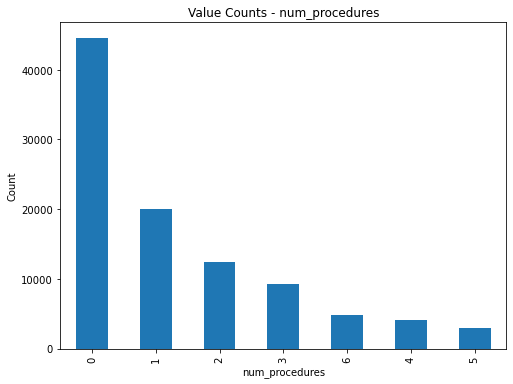

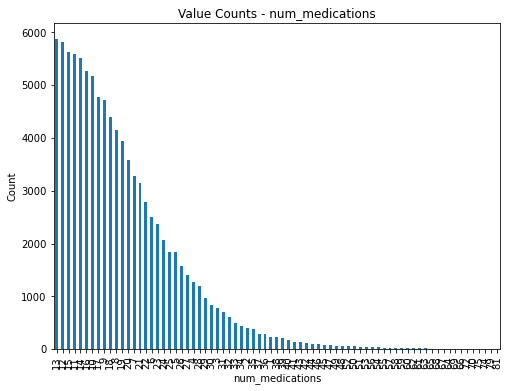

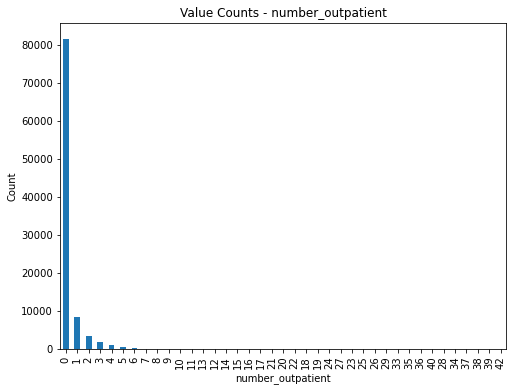

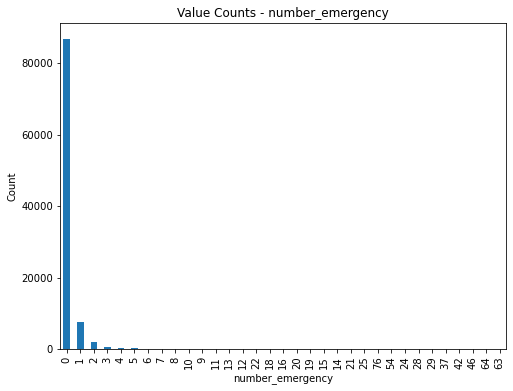

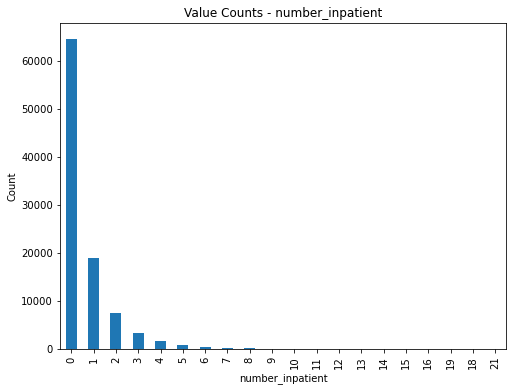

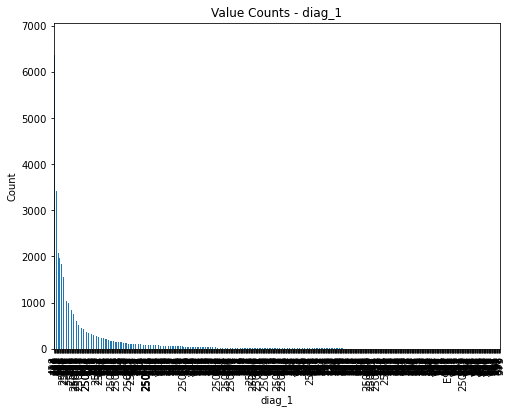

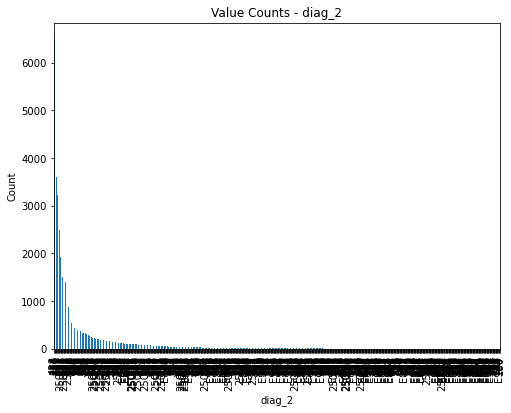

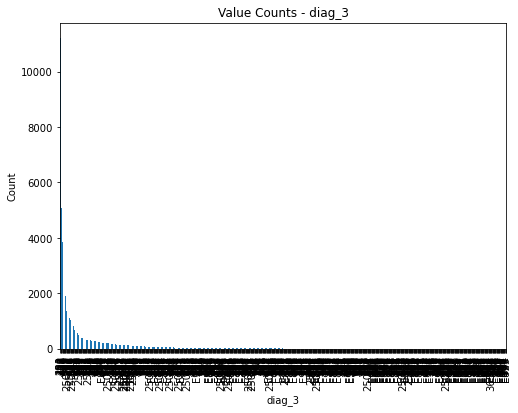

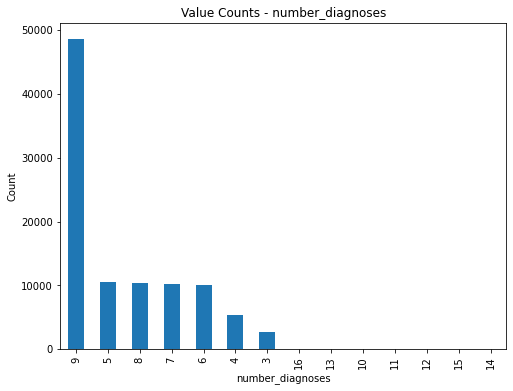

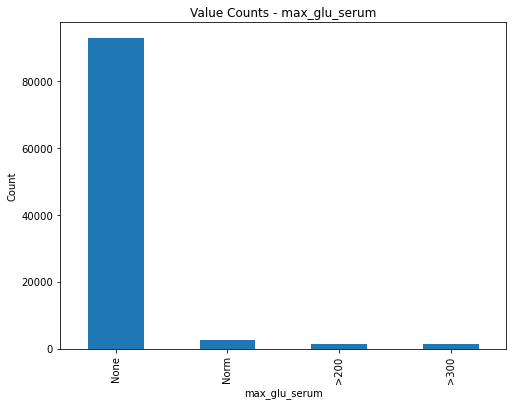

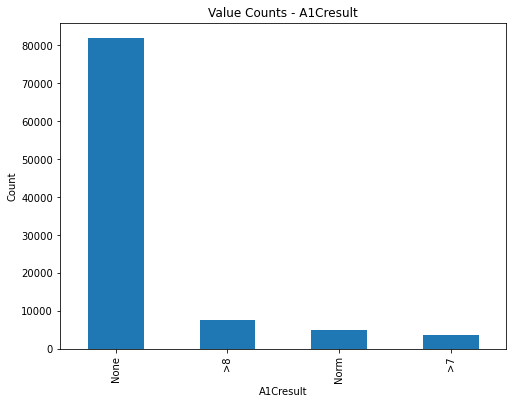

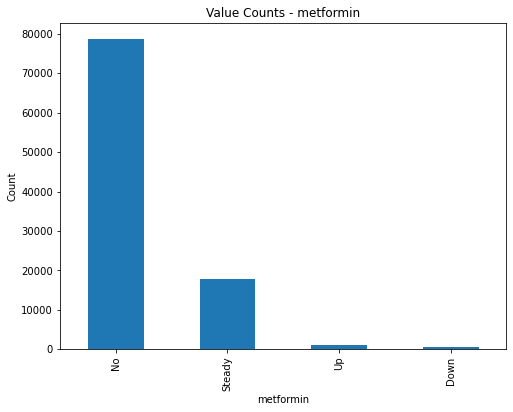

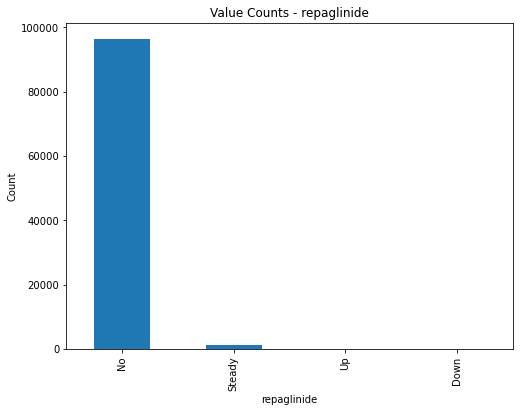

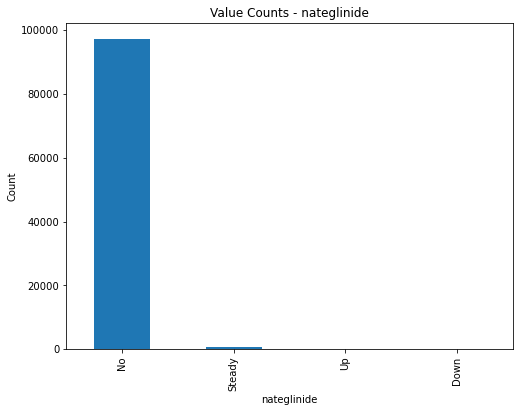

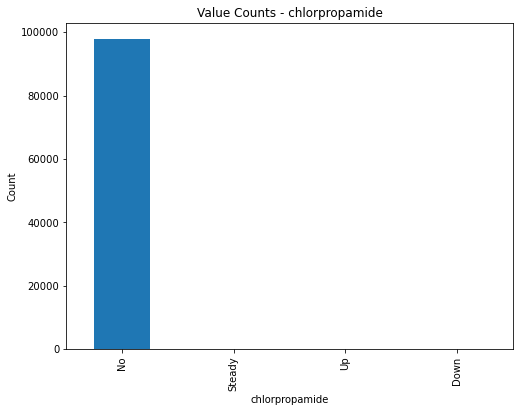

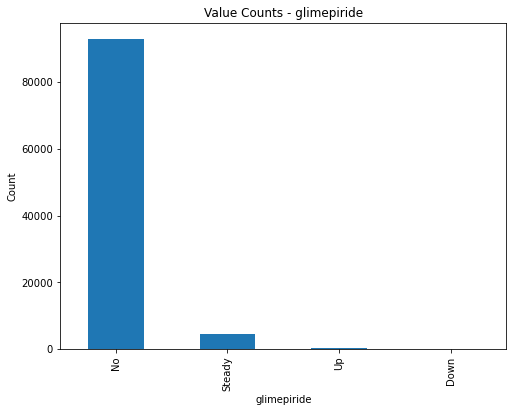

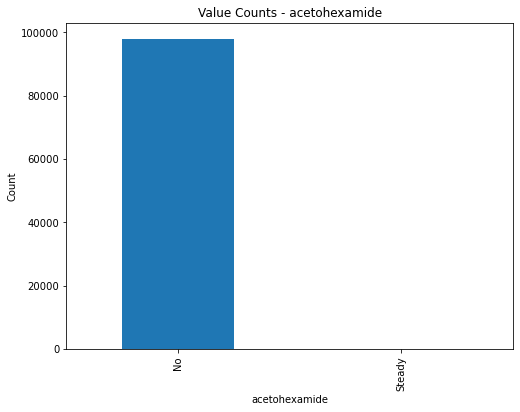

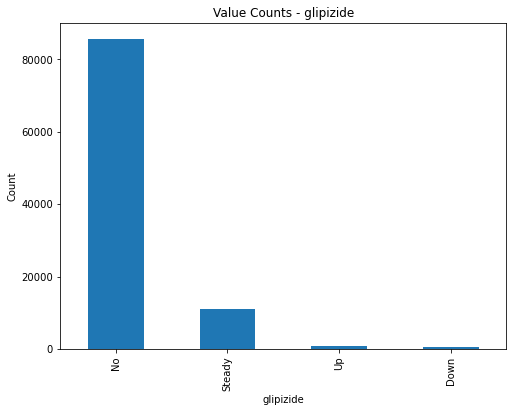

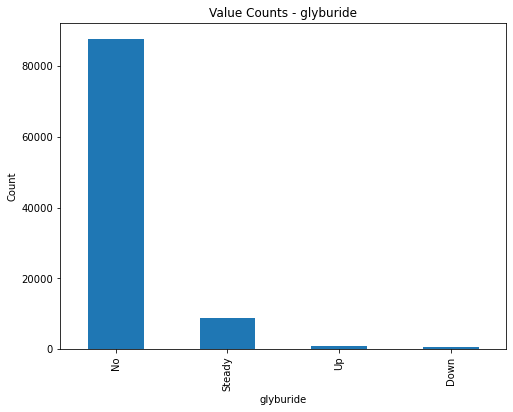

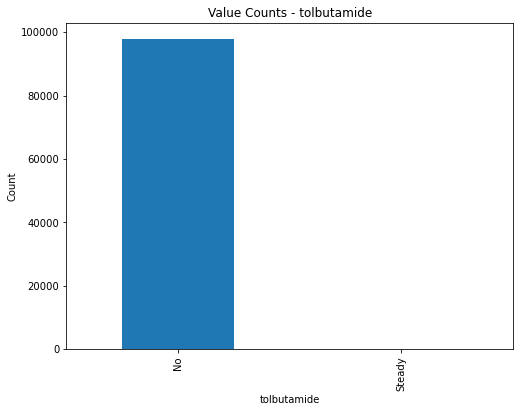

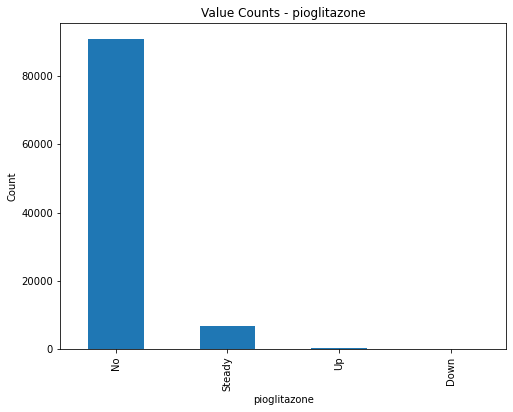

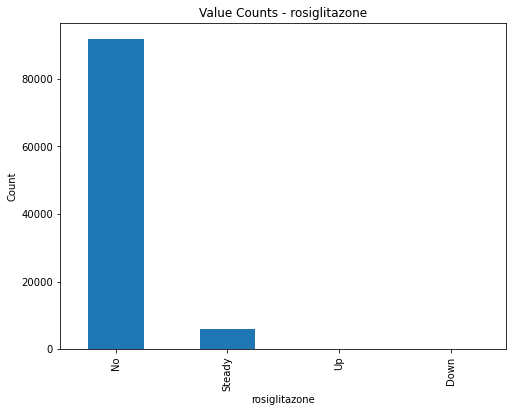

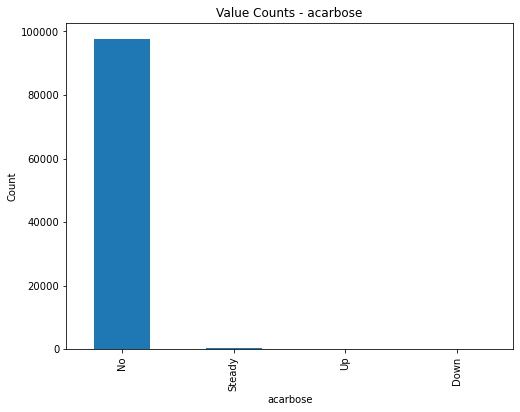

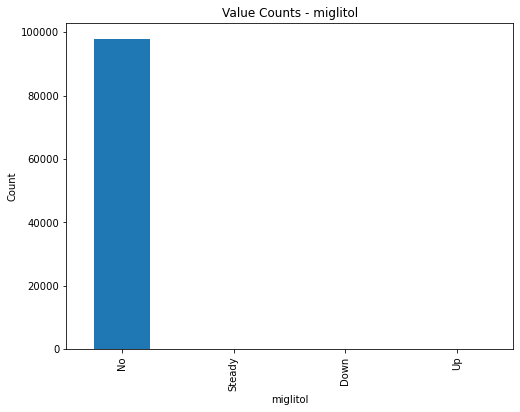

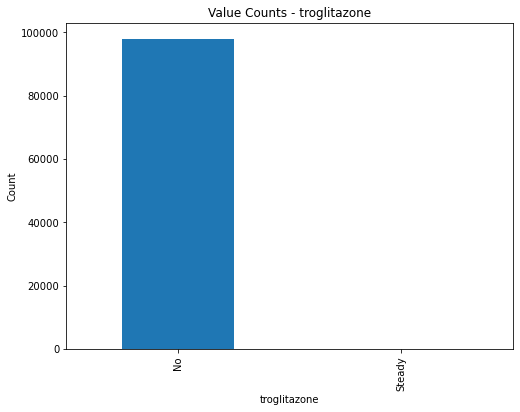

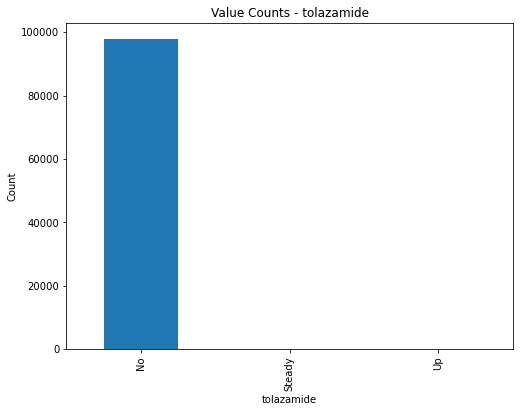

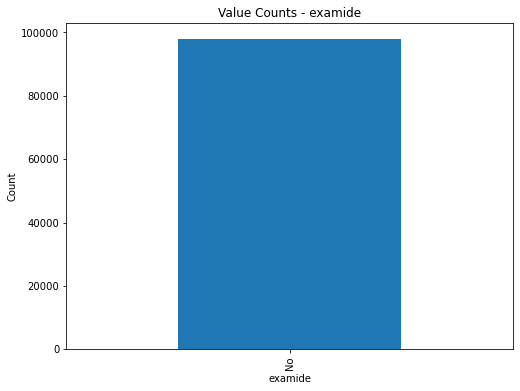

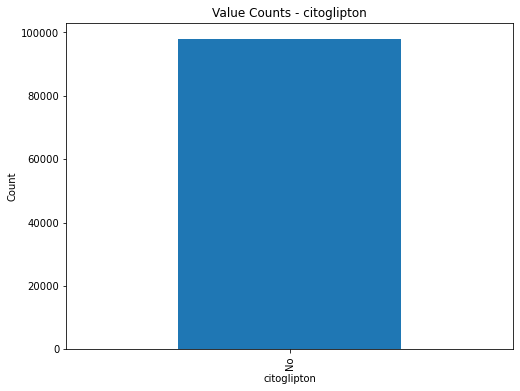

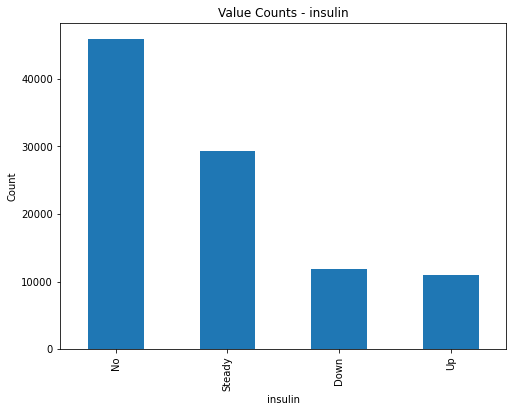

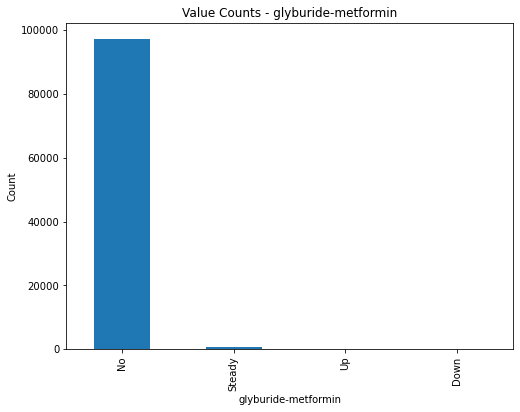

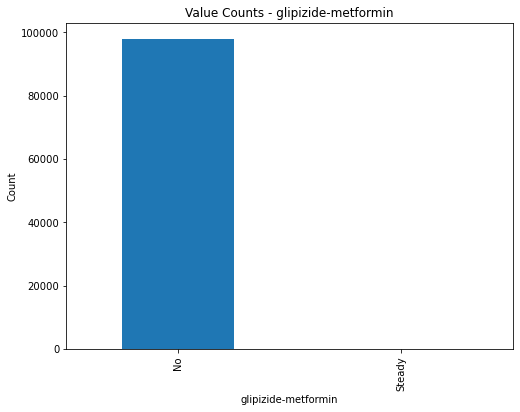

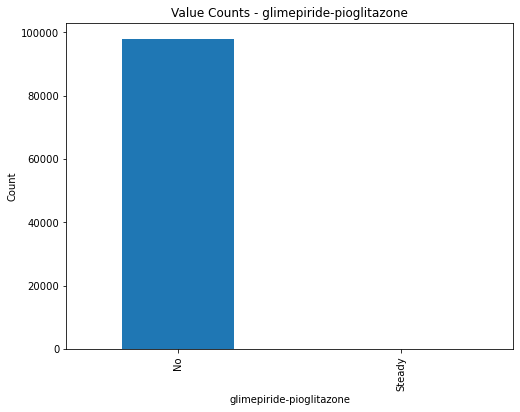

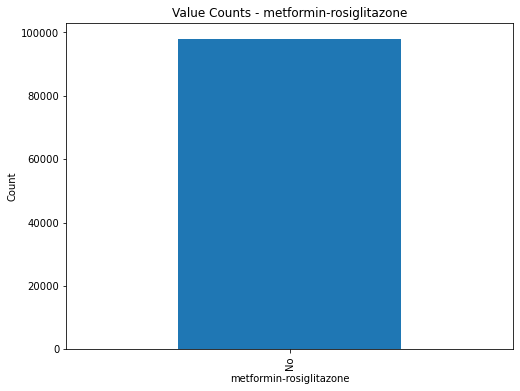

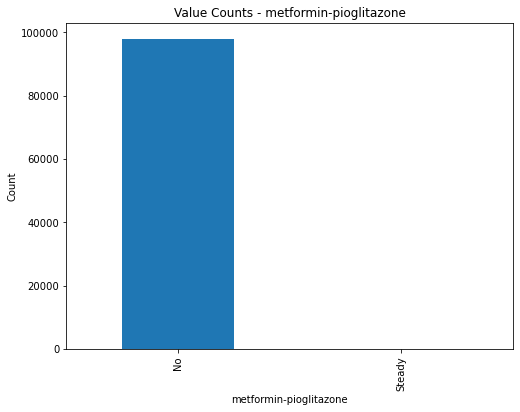

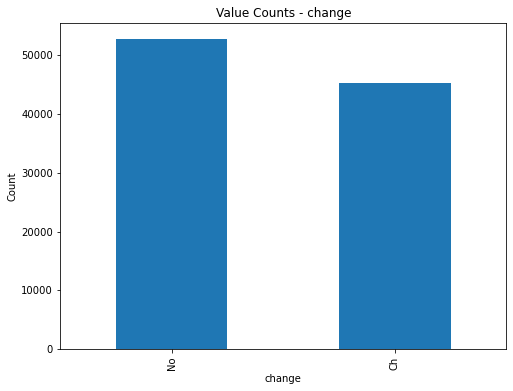

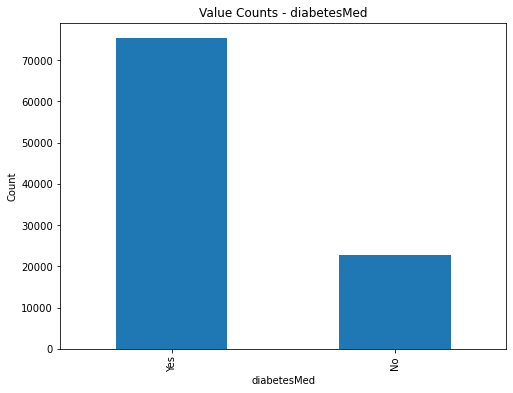

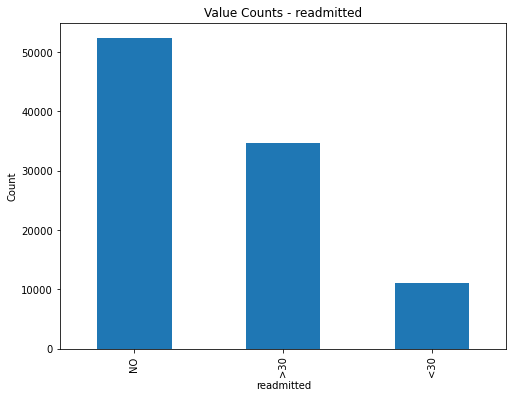

In [64]:
# Iterate over each column in the DataFrame
for column in df_clean.columns[2:]:
    # Calculate value counts for the column
    value_counts = df_clean[column][2:].value_counts()

    # Create a bar plot for the value counts
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar')
    plt.title(f'Value Counts - {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [117]:
df_clean.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

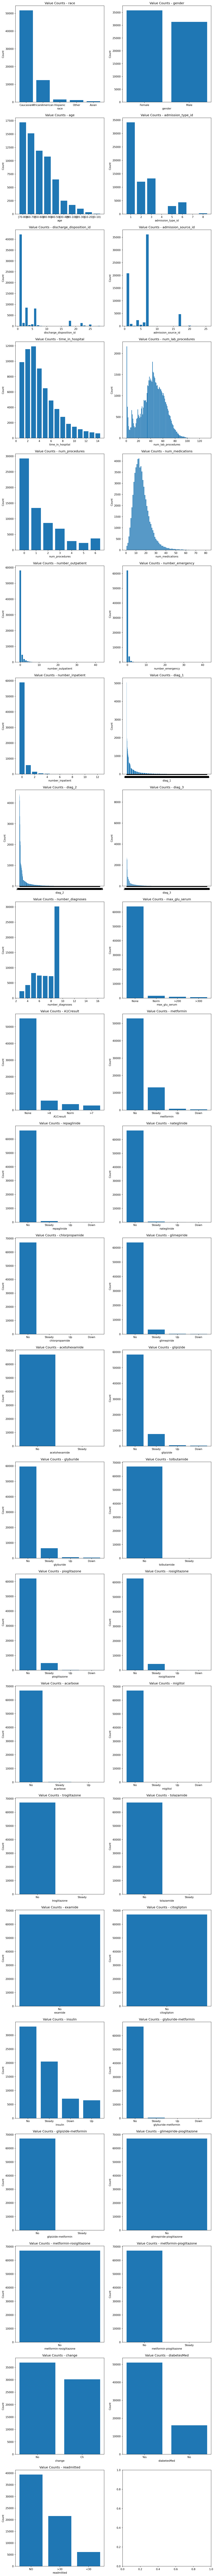

In [312]:
# Define the starting index for slicing the DataFrame columns
# I don't need to graph the encounter_id nor the patient_id
start_index = 2

# Calculate the number of columns to display on each row
columns_per_row = 2

# Calculate the total number of rows needed
total_rows = (len(df_clean.columns) - start_index) // columns_per_row + (
    (len(df_clean.columns) - start_index) % columns_per_row > 0)

# Create subplots
fig, axes = plt.subplots(total_rows, columns_per_row, 
                         figsize=(12, total_rows * 6), dpi=150)
fig.tight_layout(pad=4.0)

# Iterate over the columns in the DataFrame
for i, column in enumerate(df_clean.columns[start_index:]):
    # Calculate value counts for the column
    value_counts = df_clean[column].value_counts()

    # Calculate the subplot indices
    row_index, col_index = divmod(i, columns_per_row)

    # Create a bar plot for the value counts in the appropriate subplot
    axes[row_index, col_index].bar(value_counts.index, value_counts)
    axes[row_index, col_index].set_title(f'Value Counts - {column}')
    axes[row_index, col_index].set_xlabel(column)
    axes[row_index, col_index].set_ylabel('Count')

    # Hide any unused subplots
    if i + 1 >= total_rows * columns_per_row:
        break

# Display the subplots
plt.show()

In [128]:
df_clean['admission_type_id'].value_counts()

1    50586
3    17998
2    17203
6     5051
5     4495
8      312
7       17
4       10
Name: admission_type_id, dtype: int64

In [129]:
df_clean['num_lab_procedures'].value_counts()

1      3042
43     2673
44     2365
45     2261
38     2098
       ... 
114       1
118       1
129       1
120       1
121       1
Name: num_lab_procedures, Length: 118, dtype: int64

In [17]:
df_clean['num_medications'].value_counts()

13    5885
12    5816
15    5621
11    5592
14    5520
      ... 
70       2
75       2
74       1
79       1
81       1
Name: num_medications, Length: 75, dtype: int64

In [18]:
df_clean['number_outpatient'].value_counts()

0     81679
1      8340
2      3514
3      2005
4      1078
5       521
6       297
7       153
8        98
9        83
10       57
11       41
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
22        5
18        5
19        3
24        3
27        3
23        2
25        2
26        2
29        2
33        2
35        2
36        2
40        1
28        1
34        1
37        1
38        1
39        1
42        1
Name: number_outpatient, dtype: int64

In [19]:
df_clean['number_emergency'].value_counts()

0     86845
1      7550
2      2011
3       716
4       372
5       190
6        93
7        72
8        50
10       34
9        32
11       22
13       12
12       10
22        6
18        5
16        5
20        4
19        4
15        3
14        2
21        2
25        2
76        1
54        1
24        1
28        1
29        1
37        1
42        1
46        1
64        1
63        1
Name: number_emergency, dtype: int64

In [20]:
df_clean['number_inpatient'].value_counts()

0     64633
1     19067
2      7421
3      3346
4      1597
5       802
6       474
7       266
8       147
9       111
10       60
11       48
12       33
13       20
14       10
15        8
16        5
19        2
18        1
21        1
Name: number_inpatient, dtype: int64

In [149]:
df_clean['diag_1'].value_counts()

428    6531
414    6343
786    3899
410    3353
486    3290
       ... 
913       1
906       1
217       1
700       1
605       1
Name: diag_1, Length: 711, dtype: int64

In [148]:
df_clean['diag_2'].value_counts()

276    6351
428    6317
250    5394
427    4779
401    3599
       ... 
944       1
66        1
908       1
145       1
212       1
Name: diag_2, Length: 739, dtype: int64

In [127]:
df_clean['diag_3'].value_counts()

250     11122
401      8045
276      4878
428      4328
427      3698
        ...  
622         1
880         1
893         1
17          1
E822        1
Name: diag_3, Length: 783, dtype: int64

In [298]:
df_clean['number_diagnoses'].value_counts()

16    0
15    0
14    0
13    0
12    0
11    0
10    0
9     0
8     0
7     0
6     0
5     0
4     0
3     0
Name: number_diagnoses, dtype: int64

In [295]:
# Define the desired order of categories
num_diag_category_order = ['3', '4', '5', '6', '7', '8', 
                           '9', '10', '11', '12', '13', 
                           '14', '15', '16']

# Convert the max_glu_serum column to Categorical data type with the desired category order
df_clean['number_diagnoses'] = pd.Categorical(df_clean['number_diagnoses'], 
                                           categories=num_diag_category_order, ordered=True)

In [297]:
df_clean['max_glu_serum'].value_counts()

None    90656
Norm     2481
>200     1383
>300     1152
Name: max_glu_serum, dtype: int64

In [280]:
# Define the desired order of categories
glu_category_order = ['None', 'Norm', '>200', '>300']

# Convert the max_glu_serum column to Categorical data type with the desired category order
df_clean['max_glu_serum'] = pd.Categorical(df_clean['max_glu_serum'], 
                                           categories=glu_category_order, ordered=True)

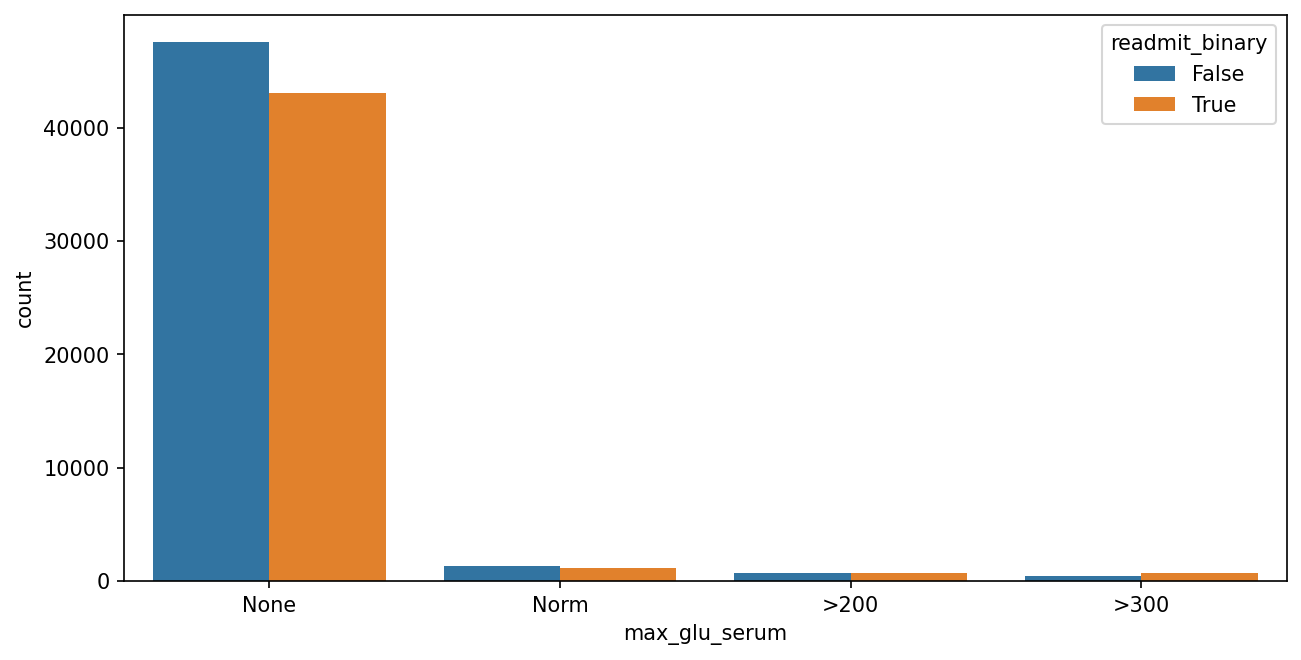

In [294]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "max_glu_serum", hue = "readmit_binary")
plt.show()

In [26]:
df_clean['A1Cresult'].value_counts()

None    81859
>8       7631
Norm     4854
>7       3708
Name: A1Cresult, dtype: int64

In [292]:
# Define the desired order of categories
A1C_category_order = ['None', 'Norm', '>7', '>8']

# Convert the A1Cresult column to Categorical data type with the desired category order
df_clean['A1Cresult'] = pd.Categorical(df_clean['A1Cresult'], 
                                           categories=A1C_category_order, ordered=True)

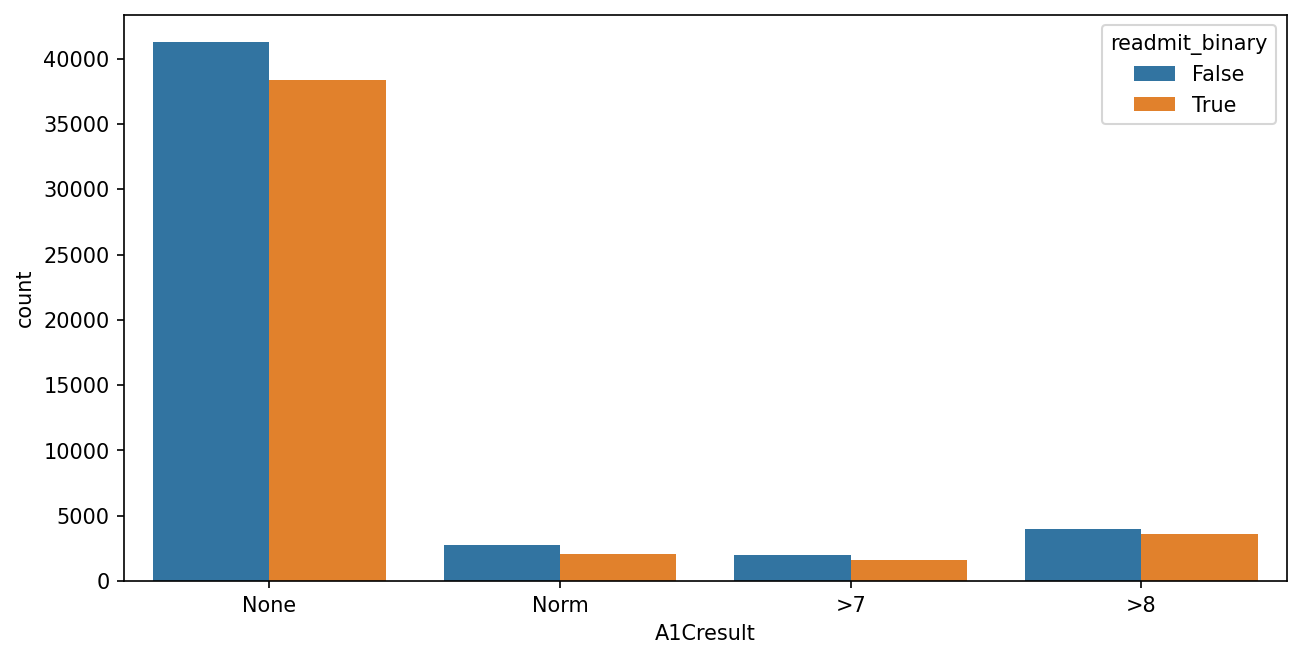

In [293]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "A1Cresult", hue = "readmit_binary")
plt.show()

In [118]:
df_clean['age'].value_counts()

[70-80)     24580
[60-70)     21394
[50-60)     16504
[80-90)     15952
[40-50)      9189
[30-40)      3537
[90-100)     2516
[20-30)      1470
[10-20)       466
[0-10)         64
Name: age, dtype: int64

In [269]:
# Define the desired order of categories
age_category_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', 
                          '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']

# Convert the age column to Categorical data type with the desired category order
df_clean['age'] = pd.Categorical(df_clean['age'], categories=age_category_order, ordered=True)

# Sort the DataFrame by the age column
# df_clean.sort_values('age', inplace=True)

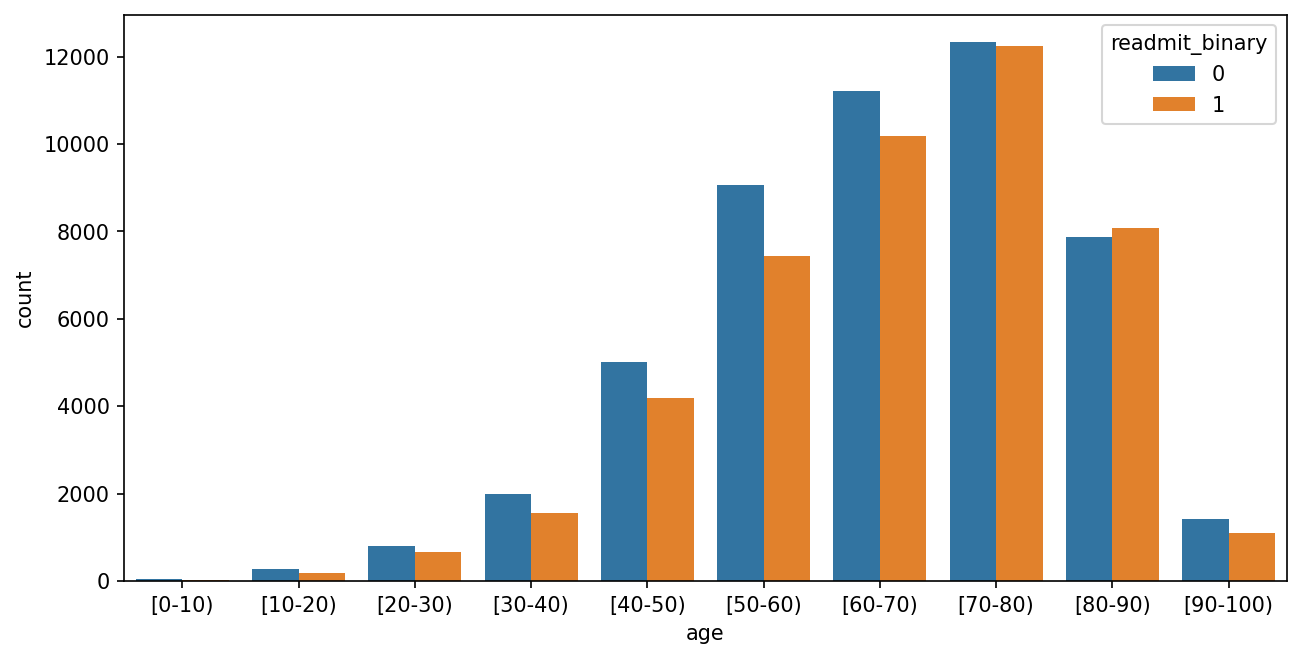

In [270]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "age", hue = "readmit_binary")
plt.show()

In [54]:
df_clean['insulin'].value_counts()

No        45942
Steady    29368
Down      11843
Up        10899
Name: insulin, dtype: int64

In [288]:
# Define the desired order of categories
insulin_category_order = ['No', 'Steady', 'Down', 'Up']

# Convert the insulin column to Categorical data type with the desired category order
df_clean['insulin'] = pd.Categorical(df_clean['insulin'], 
                                     categories=insulin_category_order, ordered=True)

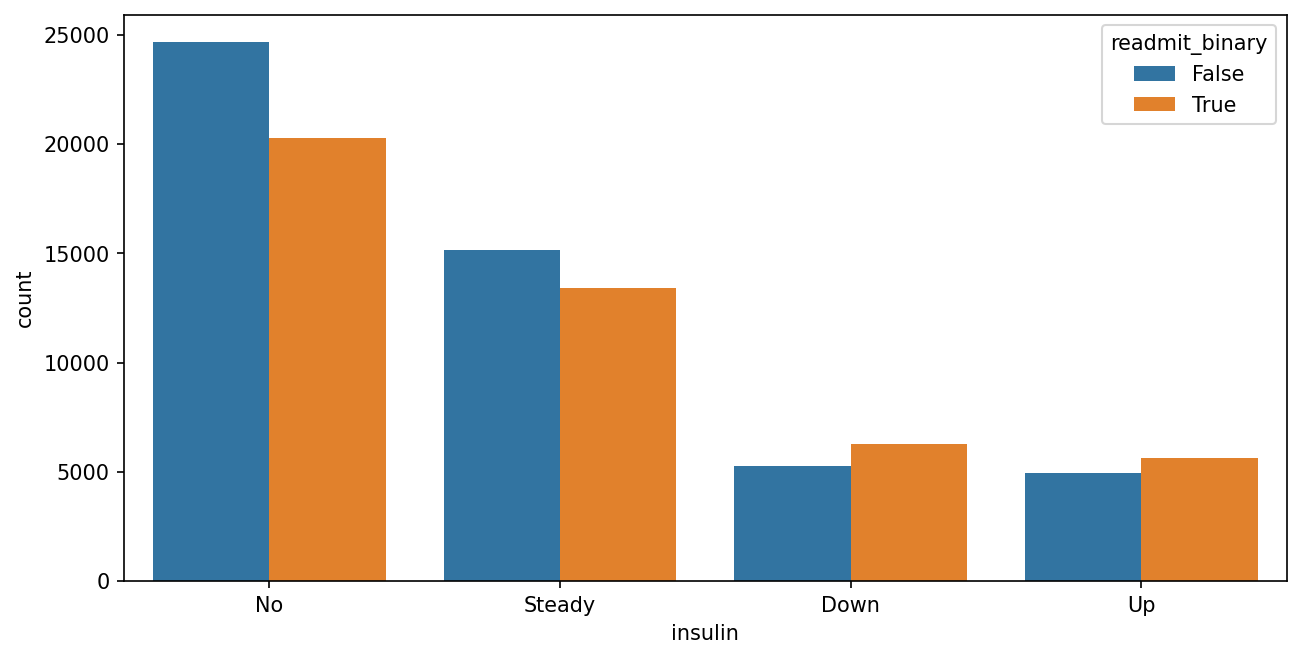

In [289]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "insulin", hue = "readmit_binary")
plt.show()

In [10]:
df_clean['diabetesMed'].value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

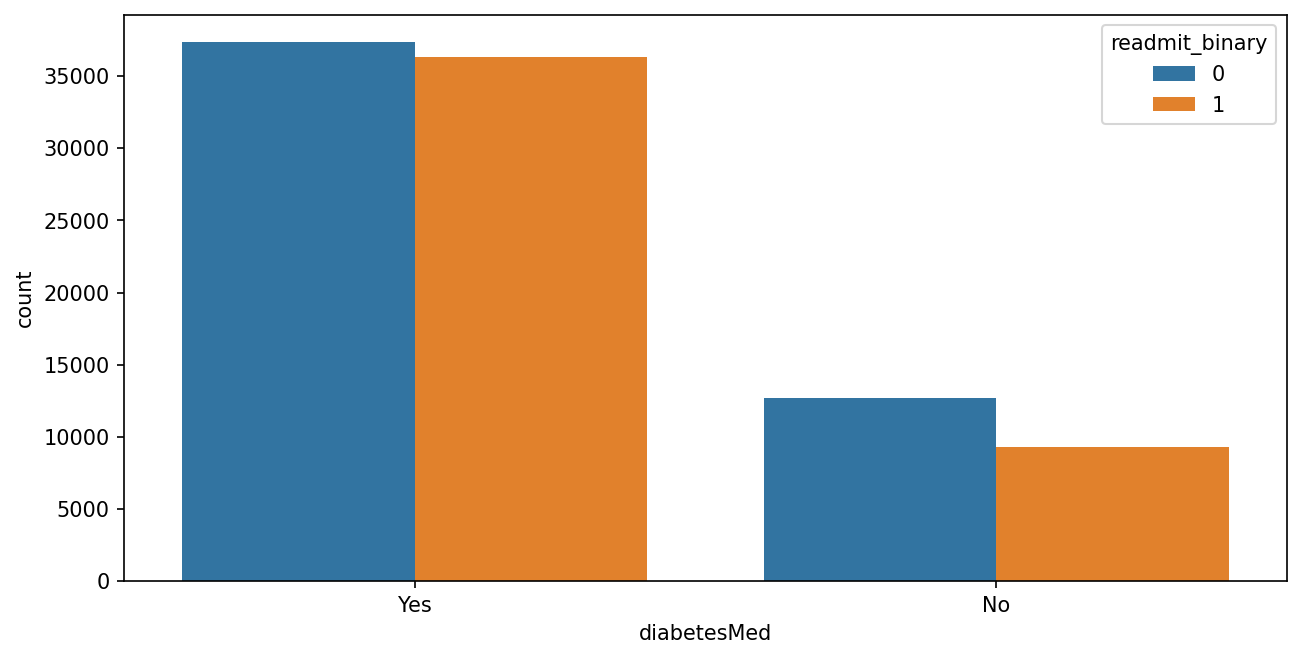

In [266]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "diabetesMed", hue = "readmit_binary")
plt.show()

In [27]:
df_clean['race'].value_counts()

Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1483
Asian                625
Name: race, dtype: int64

In [271]:
# Define the desired order of categories
race_category_order = ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other']

# Convert the race column to Categorical data type with the desired category order
df_clean['race'] = pd.Categorical(df_clean['race'], categories=race_category_order, ordered=True)

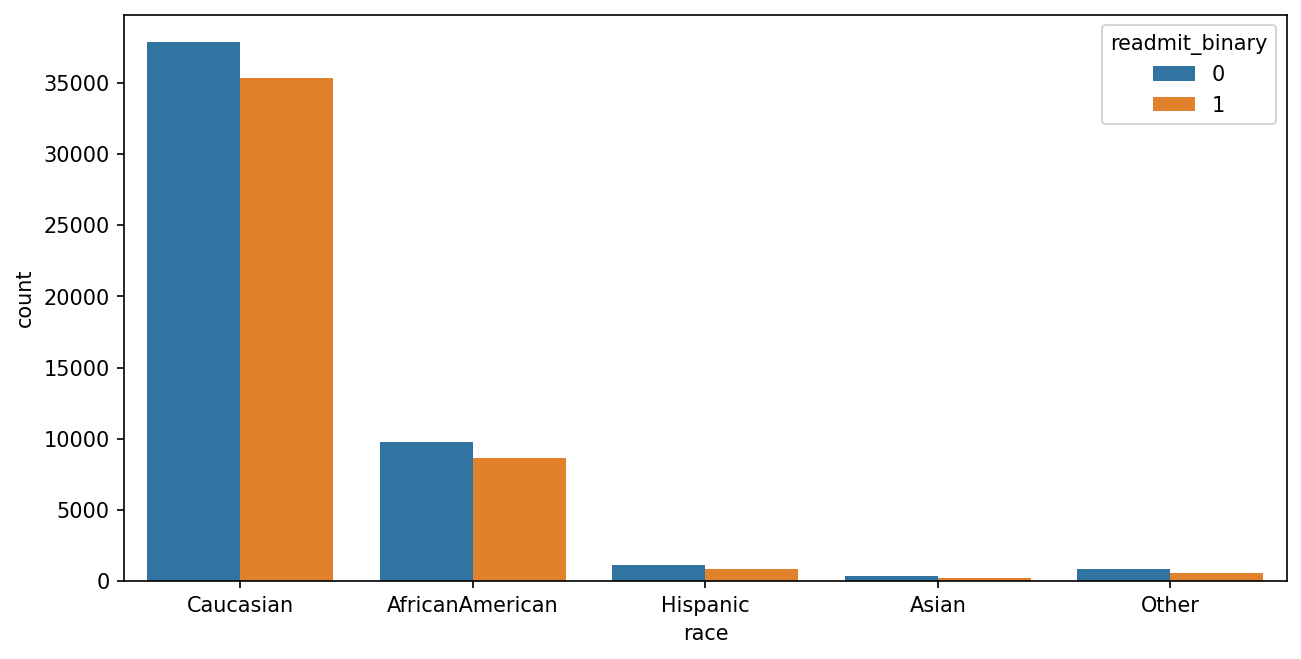

In [272]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "race", hue = "readmit_binary")
plt.show()

In [28]:
df_clean['examide'].value_counts()

No    98052
Name: examide, dtype: int64

In [260]:
df_clean['gender'].value_counts()

Female    51596
Male      44076
Name: gender, dtype: int64

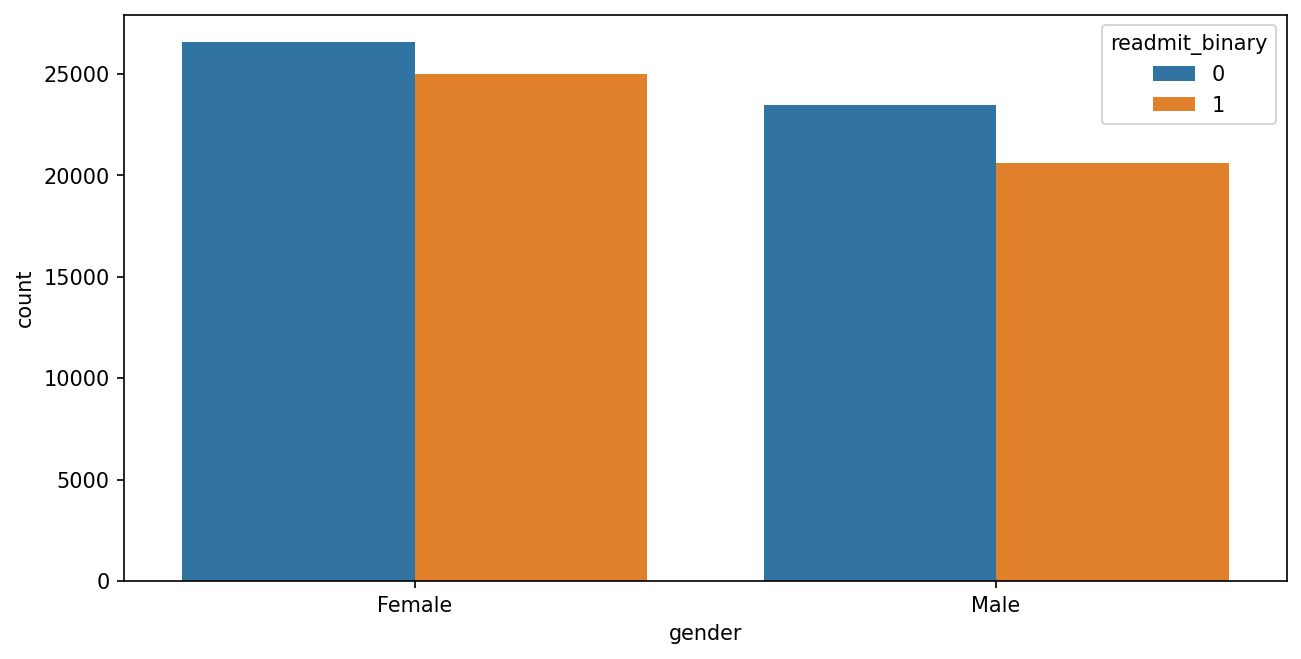

In [264]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "gender", hue = "readmit_binary")
plt.show()

In [277]:
df_clean['change'].value_counts()

No    51266
Ch    44406
Name: change, dtype: int64

In [ ]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "gender", hue = "readmit_binary")
plt.show()

## Feature Engineering

### readmit_binary
Creating a binary column for readmission, which originally has three categories, for modeling.

In [206]:
# creating a column for binary target model
df_clean['readmit_binary'] = (df_clean['readmitted'] != 'NO').astype(int)

<ipython-input-206-7a0520358e6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['readmit_binary'] = (df_clean['readmitted'] != 'NO').astype(int)


In [273]:
# creating a column for binary target model
df_clean = df_clean.copy()  # Create a copy of the DataFrame
df_clean['readmit_binary'] = (df_clean['readmitted'] != 'NO').astype(bool)

In [274]:
df_clean.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit_binary,num_change
56934,162997158,110587005,Other,Male,[0-10),emergency,home,emergencyRoom,4,55,...,No,No,No,No,No,No,No,NO,False,0
9487,41349024,4212459,Caucasian,Female,[0-10),elective,home,referral,6,65,...,No,No,No,No,No,No,Yes,NO,False,0
3764,22575144,3355146,Caucasian,Female,[0-10),emergency,home,emergencyRoom,3,50,...,No,No,No,No,No,Ch,Yes,NO,False,1
9560,41490648,2070018,Caucasian,Female,[0-10),emergency,home,emergencyRoom,3,40,...,No,No,No,No,No,No,Yes,NO,False,0
13611,53963346,18933138,Caucasian,Female,[0-10),elective,home,referral,2,3,...,No,No,No,No,No,No,No,NO,False,0


Class 0 means no record of readmission and 1 means yes readmission, whether it is within 30 days or not. 

In [275]:
df_clean['readmit_binary'].value_counts()

False    50043
True     45629
Name: readmit_binary, dtype: int64

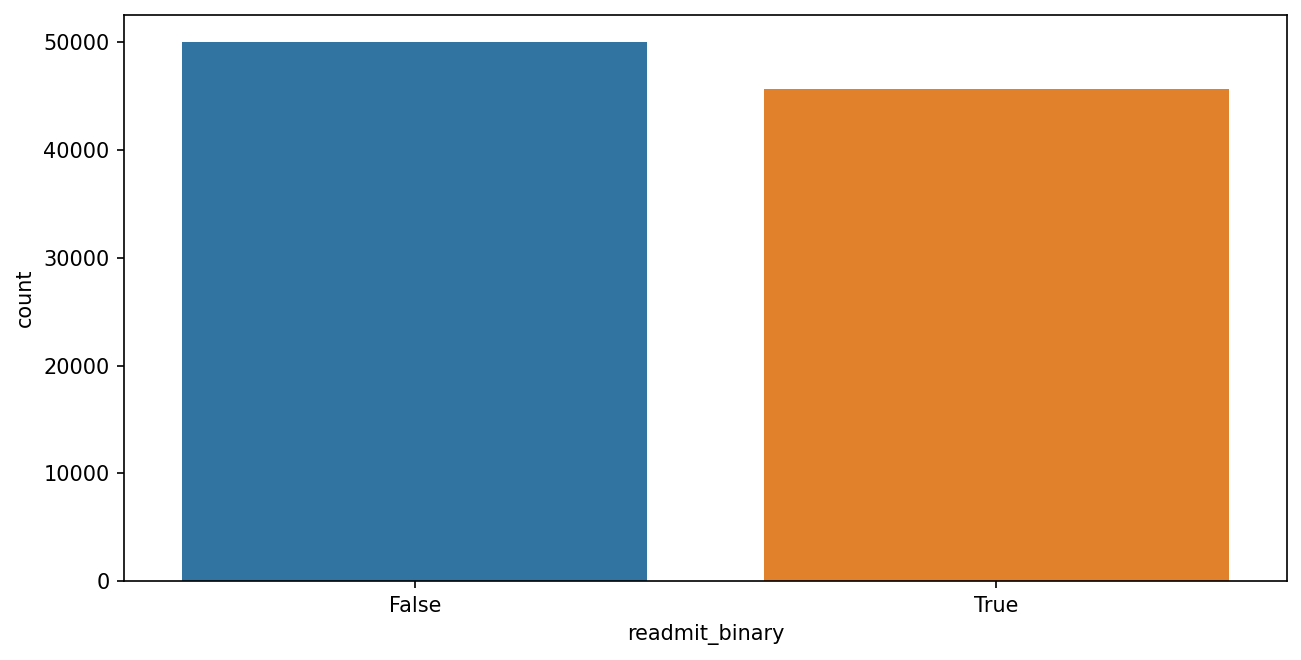

In [276]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "readmit_binary")
plt.show()

### num_change
There are a lot of drugs in this dataset and so I am making a column named 'num_change' to indicate how many timmes a patient's medication changes. The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. 

Accorning to literature, medication change has been shown to be associated with lower readmission rates. I decided to count how many changes were made in total for each patient, and declared that a new feature. The reasoning here was to both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.

In [210]:
df_clean['metformin'].value_counts()

No        76568
Steady    17541
Up         1013
Down        550
Name: metformin, dtype: int64

In [211]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
        'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 
        'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone', 
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 
        'troglitazone', 'tolbutamide', 'acetohexamide',
        'examide', 'citoglipton'
       ]

In [212]:
# Create temporary columns and calculate 'numchange'
for col in keys:
    colname = f'{col}_temp'
    df_clean[colname] = df_clean[col].map({'No': 0, 'Steady': 0, 'Up': 1, 'Down': 1})
df_clean['num_change'] = df_clean[[f'{col}_temp' for col in keys]].sum(axis=1)

In [213]:
df_clean.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,metformin-pioglitazone_temp,metformin-rosiglitazone_temp,glimepiride-pioglitazone_temp,glipizide-metformin_temp,troglitazone_temp,tolbutamide_temp,acetohexamide_temp,examide_temp,citoglipton_temp,num_change
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,0,0,0,0,0,0,0,0,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,0,0,0,0,0,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,0,0,0,0,0,0,0,0,0,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,0,0,0,0,0,0,0,0,0,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,0,0,0,0,0,0,0,0,0,0
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,0,0,0,0,0,0,0,0,0,0
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,...,0,0,0,0,0,0,0,0,0,0
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,0,0,0,0,0,0,0,0,0,0
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,...,0,0,0,0,0,0,0,0,0,0
10,28236,89869032,AfricanAmerican,Female,[40-50),1,1,7,9,47,...,0,0,0,0,0,0,0,0,0,0


In [214]:
# Drop the temporary columns
df_clean.drop(columns=[f'{col}_temp' for col in keys], inplace=True)

# Display the value counts of 'numchange'
df_clean['num_change'].value_counts()

0    69598
1    24701
2     1262
3      106
4        5
Name: num_change, dtype: int64

In [215]:
# sanity check
df_clean.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmit_binary', 'num_change'],
      dtype='object')

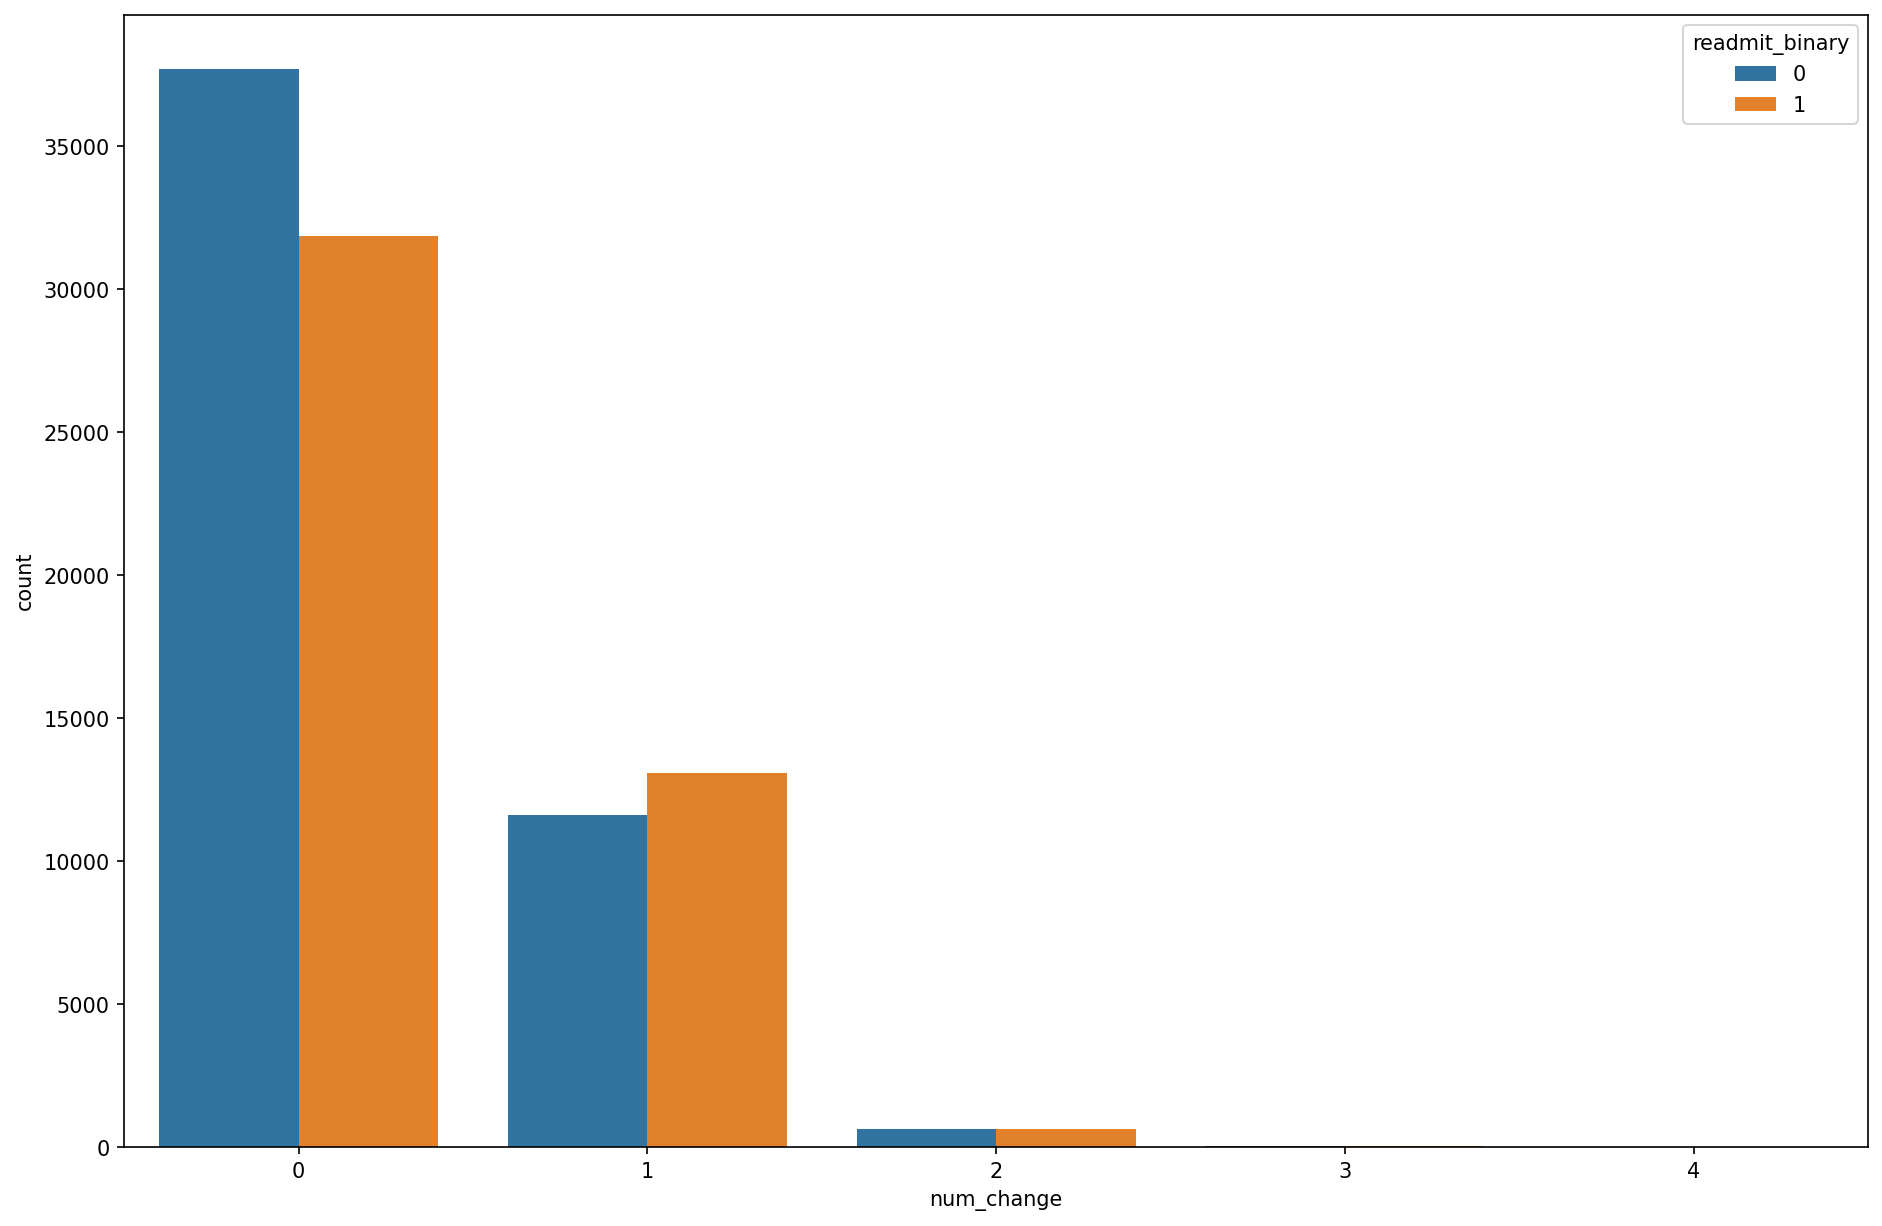

In [247]:
fig, axs = plt.subplots(figsize = (15, 10), dpi = 150)

sns.countplot(data = df_clean, x = "num_change", hue = "readmit_binary")
plt.show()

## Re-coding columns to make fewer categories

### Admission_source_id

In [216]:
# Admission source id has a total of 26 categories and few of them can be re-coded into one category

In [217]:
admission_source_mapping = {1: "referral", 2: "referral", 3: "referral",
                            4: "transfer", 5: "transfer", 6: "transfer",
                            10: "transfer", 22: "transfer", 25: "transfer",
                            8: "unavailable", 14: "unavailable", 11: "unavailable",
                            13: "unavailable", 9: "unavailable", 15: "unavailable",
                            17: "unavailable", 20: "unavailable", 21: "unavailable",
                            7: "emergencyRoom"
                           }

df_clean['admission_source_id'] = df_clean['admission_source_id'].replace(admission_source_mapping)

In [218]:
df_clean['admission_source_id'].value_counts()

emergencyRoom    54333
referral         29150
unavailable       6619
transfer          5570
Name: admission_source_id, dtype: int64

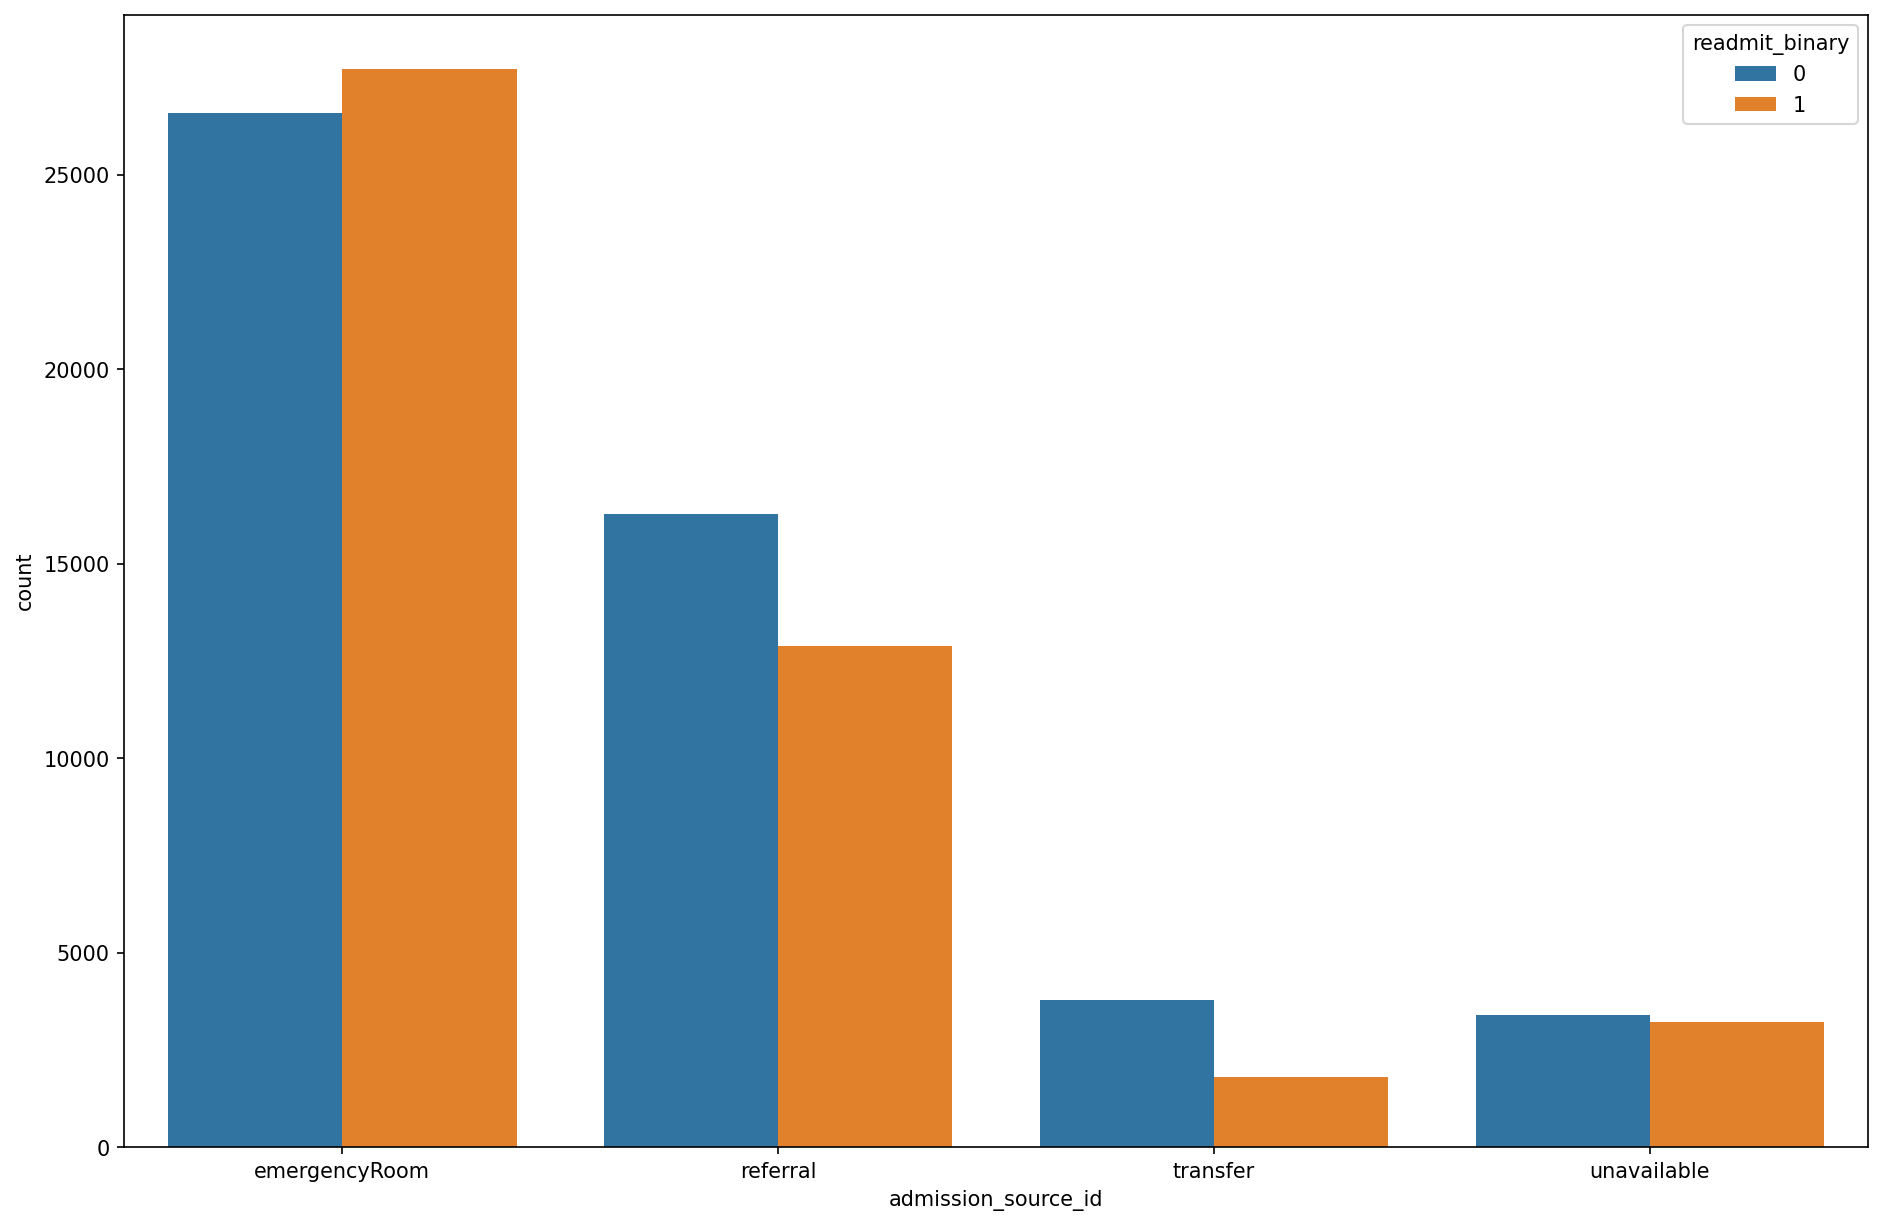

In [255]:
fig, axs = plt.subplots(figsize = (15, 10), dpi = 150)

sns.countplot(data = df_clean, x = "admission_source_id", hue = "readmit_binary")
plt.show()

### Admission_id

In [219]:
# Admission type has a total of eight categories and few of them can be re-coded into one category
"""
1,Emergency
2,Urgent
3,Elective
4,Newborn
5,Not Available
6,NULL
7,Trauma Center
8,Not Mapped
"""

admission_type_mapping = {2: 1, 7: 1, 6: 5, 8: 5}
df_clean.loc[:, 'admission_type_id'] = df_clean.loc[:, 
                                                    'admission_type_id'
                                                   ].replace(admission_type_mapping)

In [220]:
df_clean['admission_type_id'].value_counts()

1    67806
3    17998
5     9858
4       10
Name: admission_type_id, dtype: int64

In [221]:
df_clean['admission_type_id'] = df_clean['admission_type_id'].replace(1, "emergency")
df_clean['admission_type_id'] = df_clean['admission_type_id'].replace(3, "elective")
df_clean['admission_type_id'] = df_clean['admission_type_id'].replace(4, "newborn")
df_clean['admission_type_id'] = df_clean['admission_type_id'].replace(5, "not_available")

In [222]:
admission_type_mapping = {1: "emergency", 3: "elective", 4: "newborn", 5: "not_available"}
df_clean.loc[:,'admission_type_id'] = df_clean.loc[:, 'admission_type_id'].replace(admission_type_mapping)

In [223]:
df_clean['admission_type_id'].value_counts()

emergency        67806
elective         17998
not_available     9858
newborn             10
Name: admission_type_id, dtype: int64

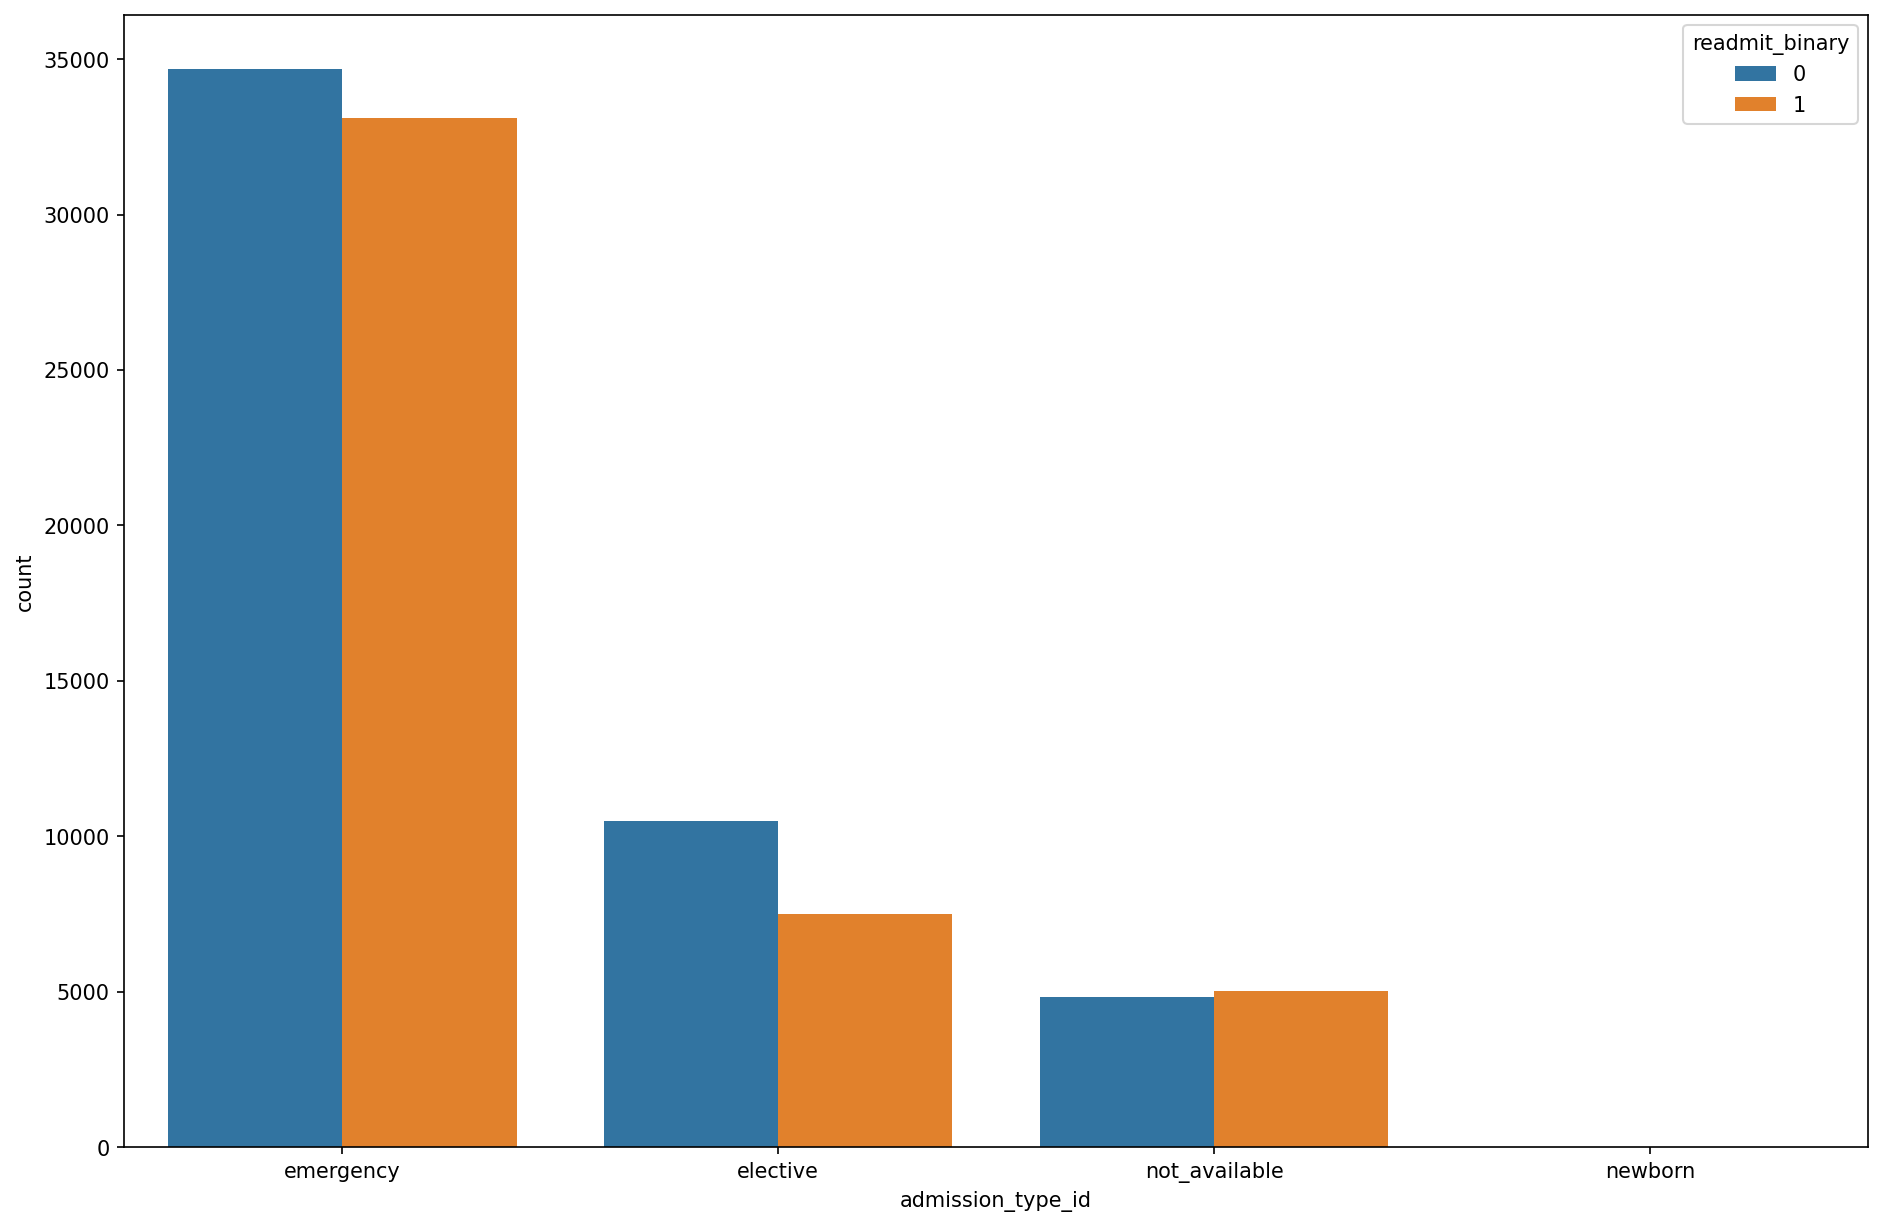

In [257]:
fig, axs = plt.subplots(figsize = (15, 10), dpi = 150)

sns.countplot(data = df_clean, x = "admission_type_id", hue = "readmit_binary")
plt.show()

### Discharge_disposition_id

In [224]:
discharge_codes_to_exclude

[11, 13, 14, 19, 20, 21]

In [ ]:
# Discharged/transferred to home under care of Home IV provider,  
# with home health service, and admitted as an inpatient to this hospital 
# re-coded to 1
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)

# Discharged/transferred to SNF, ICF, another type of inpatient care institution,
# another rehab fac including rehab units of a hospital, long term care hospital,
# a nursing facility certified under Medicaid but not certified under Medicare.
# re-coded to 2
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)

# Discharged/transferred within this institution to Medicare approved swing bed,
# another institution for outpatient services, this institution for outpatient services,
# and Neonate discharged to another hospital for neonatal aftercare
# re-coded to 12
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(10,12)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,12)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,12)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,12)

# Not Mapped and Unknown/Invalid re-coded to 18
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

In [225]:
# re-coding categories into similar categories. 
# The definitions of the different numbers can be found in IDs_mapping.csv

discharge_mapping = {6: 1, 8: 1, 9: 1, 
                     3: 2, 4: 2, 5: 2, 22: 2, 23: 2, 24: 2, 27: 2, 28:2, 
                     10: 12, 15: 12, 16: 12, 17: 12, 
                     25: 18, 26: 18}

df_clean.loc[:, 'discharge_disposition_id'] = df_clean.loc[:, 
                                                           'discharge_disposition_id'
                                                          ].replace(discharge_mapping)

In [226]:
df_clean['discharge_disposition_id'].value_counts()

1     70362
2     20056
18     4565
7       592
12       97
Name: discharge_disposition_id, dtype: int64

In [227]:
discharge_type_mapping = {1: "home", 2: "transfered", 7: "left_AMA", 12: 
                          "outpatient", 18: "not_available"}
df_clean.loc[:, 'discharge_disposition_id'] = df_clean.loc[
    :, 'discharge_disposition_id'].replace(discharge_type_mapping)

In [228]:
df_clean['discharge_disposition_id'].value_counts()

home             70362
transfered       20056
not_available     4565
left_AMA           592
outpatient          97
Name: discharge_disposition_id, dtype: int64

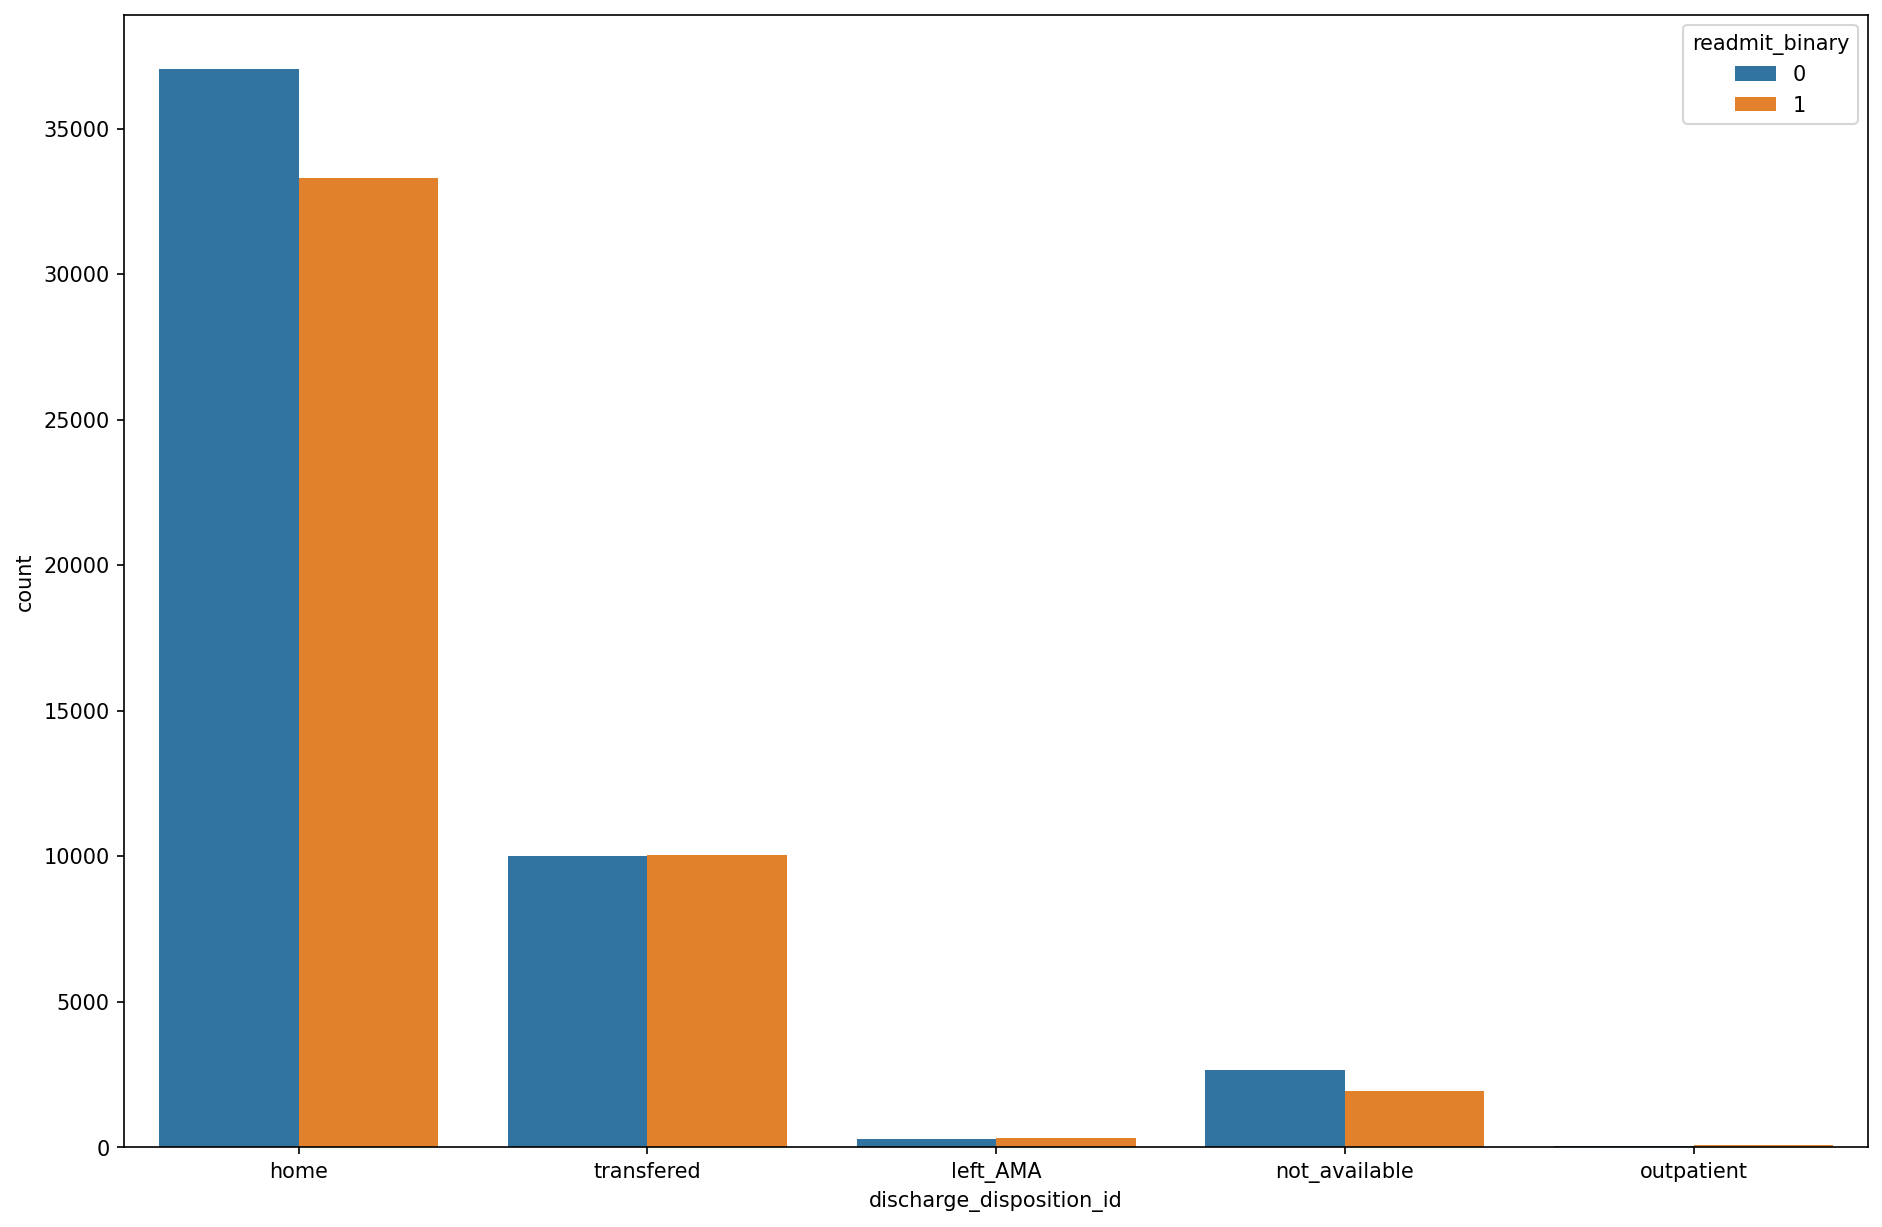

In [259]:
fig, axs = plt.subplots(figsize = (15, 10), dpi = 150)

sns.countplot(data = df_clean, x = "discharge_disposition_id", hue = "readmit_binary")
plt.show()

### Diagnosis 1, 2, & 3

I got the ICD-code categories from https://www.aapc.com/codes/icd9-codes-range/ since the columns contain the firs three numbers of the ICD-code. I mapped the data so that the numbers will be set as their assigned category.

In [231]:
df_clean.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [232]:
df_clean[df_clean['diag_1'].str.upper().str.startswith(('V', 'E'))]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit_binary,num_change
23,183930,107400762,Caucasian,Female,[80-90),emergency,home,referral,11,42,...,No,No,No,No,No,No,No,>30,1,0
42,421194,96435585,Caucasian,Female,[70-80),emergency,home,referral,13,48,...,No,No,No,No,No,Ch,Yes,>30,1,0
253,2926554,86209290,Caucasian,Female,[70-80),not_available,home,referral,7,37,...,No,No,No,No,No,Ch,Yes,NO,0,1
290,3086520,95564241,Caucasian,Female,[60-70),not_available,home,referral,8,35,...,No,No,No,No,No,No,Yes,NO,0,0
316,3187926,476343,AfricanAmerican,Female,[60-70),not_available,not_available,referral,4,54,...,No,No,No,No,No,No,No,NO,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101081,434871134,52126479,Caucasian,Female,[90-100),not_available,home,referral,7,29,...,No,No,No,No,No,No,No,>30,1,0
101127,435465620,41596461,Caucasian,Female,[90-100),elective,home,referral,1,44,...,No,No,No,No,No,No,No,NO,0,0
101185,436104914,114613173,Caucasian,Female,[60-70),elective,home,referral,9,43,...,No,No,No,No,No,Ch,Yes,NO,0,1
101265,437253248,147593579,Caucasian,Female,[70-80),elective,home,transfer,8,1,...,No,No,No,No,No,Ch,Yes,<30,1,1


In [151]:
listname = [('infections', 139),
            ('neoplasms', (239 - 139)),
            ('endocrine', (279 - 239)),
            ('blood', (289 - 279)),
            ('mental', (319 - 289)),
            ('nervous', (359 - 319)),
            ('sense', (389 - 359)),
            ('circulatory', (459-389)),
            ('respiratory', (519-459)),
            ('digestive', (579 - 519)),
            ('genitourinary', (629 - 579)),
            ('pregnancy', (679 - 629)),
            ('skin', (709 - 679)),
            ('musculoskeletal', (739 - 709)),
            ('congenital', (759 - 739)),
            ('perinatal', (779 - 759)),
            ('ill-defined', (799 - 779)),
            ('injury', (999 - 799))]

In [152]:
def categorize_diagnosis(value, categories):
    for category, range_value in categories:
        if value <= range_value:
            return category
        else:
            value -= range_value
    return 'unknown'

In [153]:
columns_to_categorize = ['diag_1', 'diag_2', 'diag_3']

for column in columns_to_categorize:
    df_clean[column] = df_clean[column].apply(categorize_diagnosis, args=(listname,))

TypeError: '<=' not supported between instances of 'str' and 'int'

In [157]:
listname = [('infections', 139),
            ('neoplasms', (239 - 139)),
            ('endocrine', (279 - 239)),
            ('blood', (289 - 279)),
            ('mental', (319 - 289)),
            ('nervous', (359 - 319)),
            ('sense', (389 - 359)),
            ('circulatory', (459 - 389)),
            ('respiratory', (519 - 459)),
            ('digestive', (579 - 519)),
            ('genitourinary', (629 - 579)),
            ('pregnancy', (679 - 629)),
            ('skin', (709 - 679)),
            ('musculoskeletal', (739 - 709)),
            ('congenital', (759 - 739)),
            ('perinatal', (779 - 759)),
            ('ill-defined', (799 - 779)),
            ('injury', (999 - 799))]

def categorize_diagnosis(value, categories):
    for category, range_value in categories:
        if value <= range_value:
            return category
        else:
            value -= range_value
    return 'unknown'

In [158]:
columns_to_categorize = ['diag_1', 'diag_2', 'diag_3']

for column in columns_to_categorize:
    df_clean[column] = df_clean[column].apply(categorize_diagnosis, args=(listname,))

df_clean['diag_1'] = df_clean['diag_1'].replace(['V', 'E'], 'other')
df_clean['diag_2'] = df_clean['diag_2'].replace(['V', 'E'], 'other')
df_clean['diag_3'] = df_clean['diag_3'].replace(['V', 'E'], 'other')

TypeError: '<=' not supported between instances of 'str' and 'int'

In [159]:
listname = [('infections', 139),
            ('neoplasms', (239 - 139)),
            ('endocrine', (279 - 239)),
            ('blood', (289 - 279)),
            ('mental', (319 - 289)),
            ('nervous', (359 - 319)),
            ('sense', (389 - 359)),
            ('circulatory', (459 - 389)),
            ('respiratory', (519 - 459)),
            ('digestive', (579 - 519)),
            ('genitourinary', (629 - 579)),
            ('pregnancy', (679 - 629)),
            ('skin', (709 - 679)),
            ('musculoskeletal', (739 - 709)),
            ('congenital', (759 - 739)),
            ('perinatal', (779 - 759)),
            ('ill-defined', (799 - 779)),
            ('injury', (999 - 799))]

def categorize_diagnosis(value, categories):
    value = int(value)  # Convert value to an integer
    for category, range_value in categories:
        if value <= range_value:
            return category
        else:
            value -= range_value
    return 'unknown'

In [163]:
columns_to_categorize = ['diag_1', 'diag_2', 'diag_3']

for column in columns_to_categorize:
    df_clean[column] = df_clean[column].apply(categorize_diagnosis, args=(listname,))

df_clean['diag_1'] = df_clean['diag_1'].replace(['V', 'E'], 'other')
df_clean['diag_2'] = df_clean['diag_2'].replace(['V', 'E'], 'other')
df_clean['diag_3'] = df_clean['diag_3'].replace(['V', 'E'], 'other')


<ipython-input-163-e39e191e4227>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[column] = df_clean[column].apply(categorize_diagnosis, args=(listname,))
<ipython-input-163-e39e191e4227>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['diag_1'] = df_clean['diag_1'].replace(['V', 'E'], 'other')
<ipython-input-163-e39e191e4227>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [161]:
def categorize_diagnosis(value, categories):
    try:
        value = int(value)  # Convert the value to an integer
        for category, range_value in categories:
            if value <= range_value:
                return category
            else:
                value -= range_value
    except ValueError:
        return 'unknown'  # Return a default category for non-integer values

In [235]:
def categorize_diagnosis(value, categories):
    try:
        value = float(value)  # Convert value to a float
        for category, range_value in categories:
            if value <= range_value:
                return category
            else:
                value -= range_value
    except ValueError:
        pass
    return 'unknown'

def replace_diag_values(value):
    if value[0].lower() in ['v', 'e']:
        return 'other'
    else:
        return value

In [236]:
columns_to_categorize = ['diag_1', 'diag_2', 'diag_3']

for column in columns_to_categorize:
    df_clean[column] = df_clean[column].apply(categorize_diagnosis, args=(listname,))
    df_clean[column] = df_clean[column].apply(replace_diag_values)

In [237]:
df_clean['diag_1'].value_counts()

circulatory        28792
other              10405
respiratory         9612
digestive           8792
ill-defined         7392
injury              6590
genitourinary       4834
musculoskeletal     4717
neoplasms           3013
infections          2477
skin                2416
mental              2139
unknown             1589
blood               1068
nervous              892
pregnancy            645
sense                250
congenital            49
Name: diag_1, dtype: int64

In [165]:
df_clean['diag_2'].value_counts()

circulatory        29938
endocrine          13148
respiratory         9512
unknown             8811
genitourinary       7605
ill-defined         4372
digestive           3770
skin                3415
blood               2795
mental              2540
injury              2286
neoplasms           2274
infections          1796
musculoskeletal     1707
nervous             1043
pregnancy            407
sense                152
congenital           101
Name: diag_2, dtype: int64

In [238]:
df_clean['diag_2'].value_counts()

circulatory        29938
other              19530
respiratory         9512
genitourinary       7605
ill-defined         4372
digestive           3770
skin                3415
blood               2795
mental              2540
unknown             2429
injury              2286
neoplasms           2274
infections          1796
musculoskeletal     1707
nervous             1043
pregnancy            407
sense                152
congenital           101
Name: diag_2, dtype: int64

In [166]:
df_clean['diag_3'].value_counts()

circulatory        28593
endocrine          19840
unknown            10337
respiratory         6284
genitourinary       5949
ill-defined         4302
digestive           3436
mental              3025
blood               2399
skin                2378
musculoskeletal     1845
injury              1844
infections          1772
neoplasms           1626
nervous             1396
pregnancy            302
sense                254
congenital            90
Name: diag_3, dtype: int64

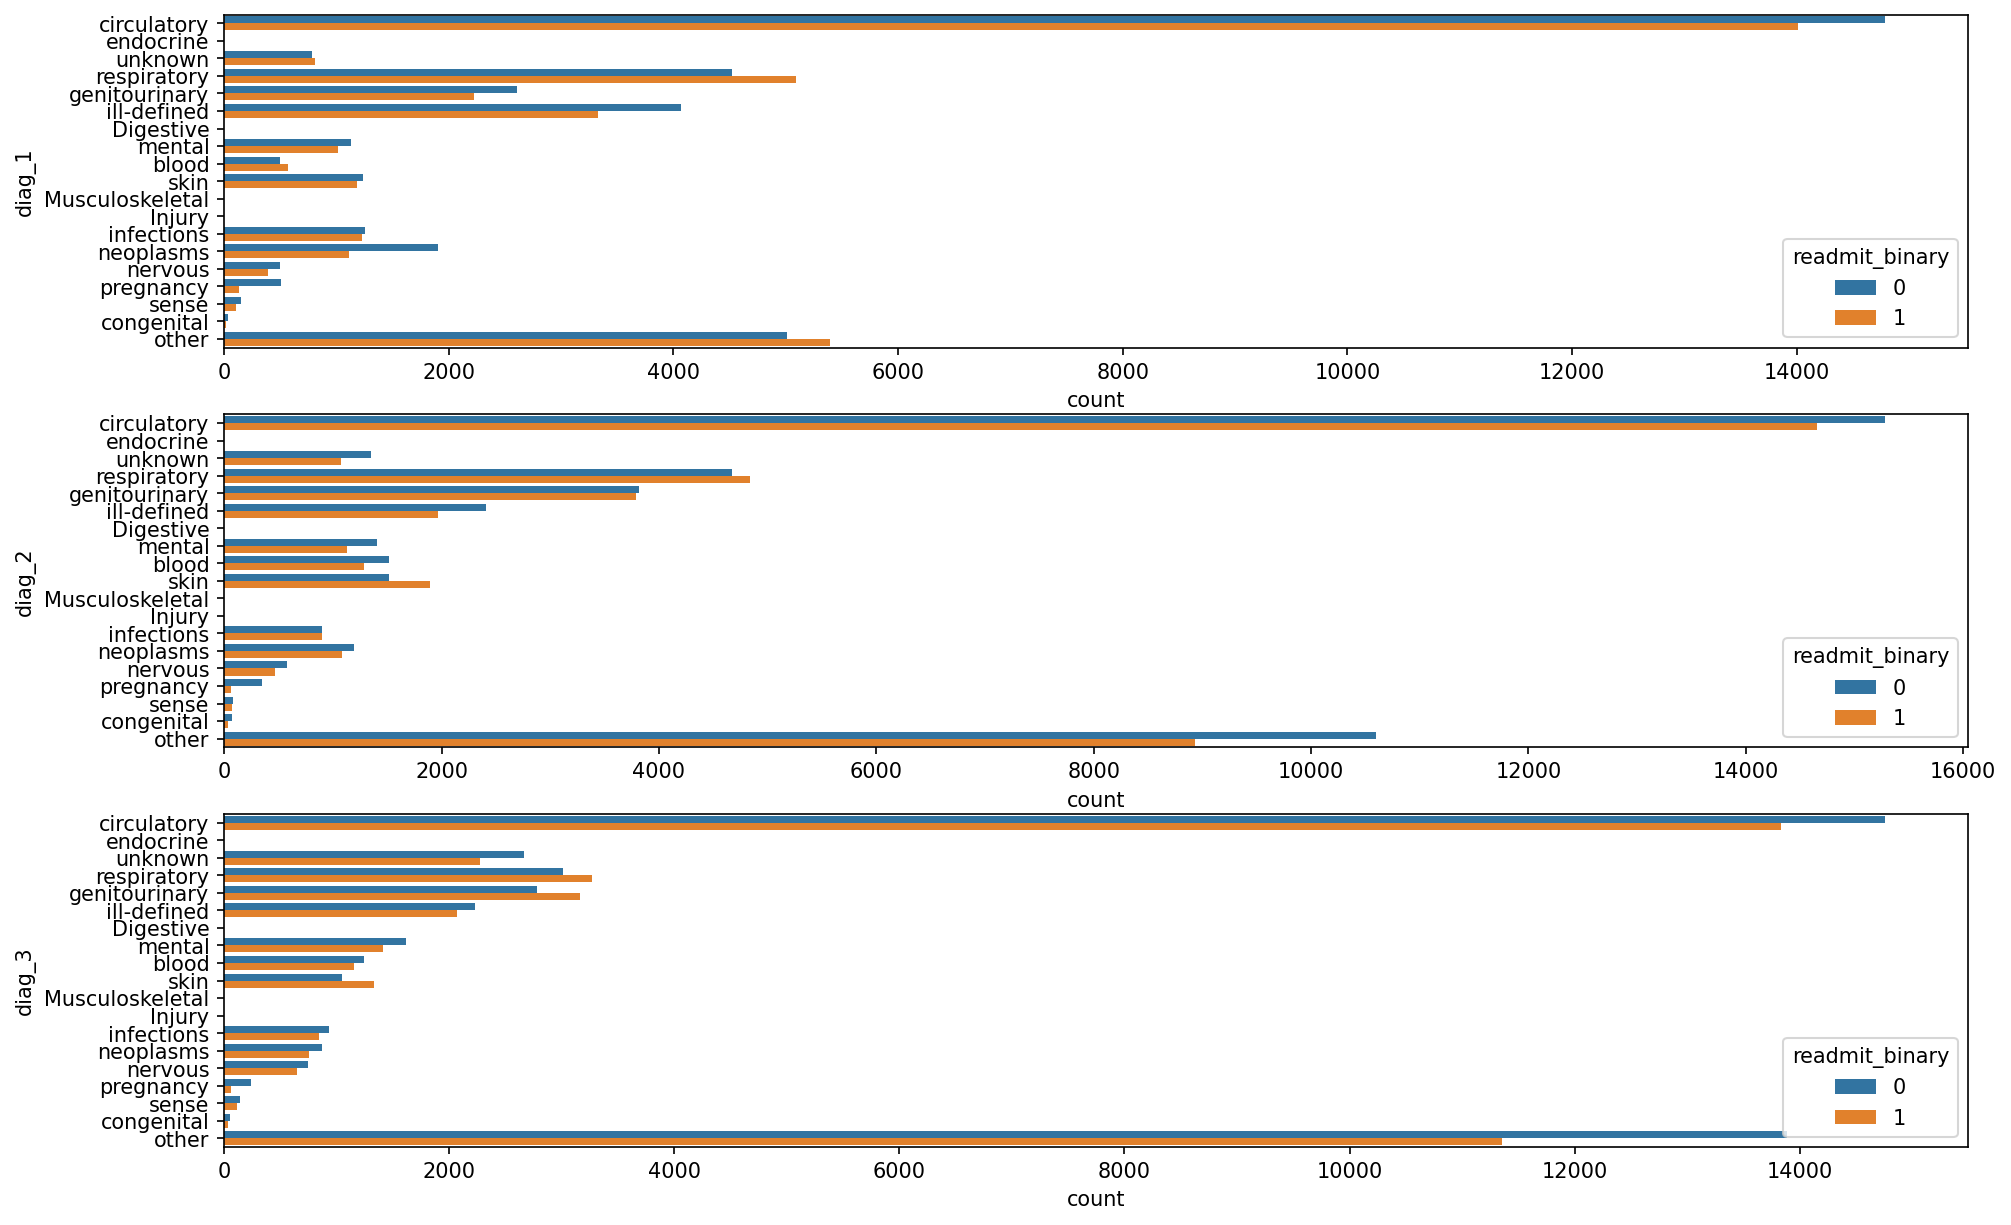

In [241]:
list_diag = ['circulatory', 'endocrine', 'unknown', 'respiratory', 'genitourinary', 
             'ill-defined', 'Digestive', 'mental', 'blood', 'skin', 
             'Musculoskeletal', 'Injury', 'infections', 'neoplasms', 'nervous', 
             'pregnancy', 'sense', 'congenital', 'other', ]

# graph
fig, axs = plt.subplots(3, 1, figsize = (15, 10), dpi=150)

sns.countplot(data = df_clean, y = "diag_1", hue = "readmit_binary", ax = axs[0], order = list_diag)
sns.countplot(data = df_clean, y = "diag_2", hue = "readmit_binary", ax = axs[1], order = list_diag)
sns.countplot(data = df_clean, y = "diag_3", hue = "readmit_binary", ax = axs[2], order = list_diag)
plt.show()

In [ ]:
# numerical features
numerical_features = training_f.columns[training_f.dtypes != 'object'].values
print(numerical_features)

# object features
categorical_features = training_f.columns[training_f.dtypes == 'object'].values
print(categorical_features)